<a href="https://colab.research.google.com/github/SalmaSherif7070/Predict-Students-Dropout-and-Academic-Success-/blob/main/Predict_Students_Dropout_and_Academic_Success_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'higher-education-predictors-of-student-retention:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2780494%2F4802354%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241012%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241012T084851Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2ce34546323f516f5a8c151e0838e31c2c4e9951ffeccce4f6f3897c47cf605dc1a2090ecb90635043faf12f5b44f3a7e9113701822608e5fd0e1584b430ca69de8cb48e6a7c1f17c6aa6420a6894fba71095d35eb0867c7ce8c212fb82633cf07735c21118e276ce67514ab1281819ebc659ff71f38cb4bb8b17b9ac69027586216558325fcbfa1a0e260f43967ab1d76561046bb79eb882d46059e2c26a340019bcee0cb3ae0935deb5ffccad8890fe8852d28e9ca81357dcb2eba84ae853b3de0b78e0443edf897bea026a959b827119f7d9f5c08c9614db60f9843af84adf6b8acbb4801625fa29f01d47a0504a24df8feeb3d1c1e3f020aef7e8e5f1346'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 89332 bytes downloaded
Downloaded and uncompressed: higher-education-predictors-of-student-retention
Data source import complete.


In [4]:
import numpy as np

import pandas as pd

import plotly.graph_objects as go

import plotly.figure_factory as ff

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification

from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score

from sklearn.linear_model import LogisticRegression

import json

import os

from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
df = df.replace('Graduate', 'Not Dropout').replace('Enrolled', 'Not Dropout')
df['Target'].unique()

array(['Dropout', 'Not Dropout'], dtype=object)

# EDA

In [7]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP       Target  
0             1.4  1.74      Dropout  
1            -0.3  0.79  Not Dropout  
2             1.4  1.74      Dropout  
3            -0.8 -3.12  Not Dropout  
4            -0.3  0.79  Not Dropout  

[5 rows x 35 columns]

## Data Quality Assesment

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [9]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for col in df.columns:

    print(f"Column {col} value counts percentage : ")

    print((df[col].value_counts())/len(df))

    print(f"Total value counts Percentage in {col} : ")

    print((df[col].value_counts().sum())/len(df))

Column Marital status value counts percentage : 
Marital status
1    0.885850
2    0.085669
4    0.020570
5    0.005651
6    0.001356
3    0.000904
Name: count, dtype: float64
Total value counts Percentage in Marital status : 
1.0
Column Application mode value counts percentage : 
Application mode
1     0.386076
8     0.197107
12    0.177441
14    0.070524
15    0.048146
4     0.031420
9     0.028029
13    0.017405
16    0.013336
7     0.008590
17    0.007911
6     0.006781
3     0.003617
5     0.002260
2     0.000678
18    0.000226
10    0.000226
11    0.000226
Name: count, dtype: float64
Total value counts Percentage in Application mode : 
1.0
Column Application order value counts percentage : 
Application order
1    0.683996
2    0.123644
3    0.069846
4    0.056284
5    0.034810
6    0.030967
9    0.000226
0    0.000226
Name: count, dtype: float64
Total value counts Percentage in Application order : 
1.0
Column Course value counts percentage : 
Course
12    0.173146
9     0.085895


**The data looks pretty fine without missing values so far.**

In [12]:
df.describe().T

count       mean        std  \
Marital status                                  4424.0   1.178571   0.605747   
Application mode                                4424.0   6.886980   5.298964   
Application order                               4424.0   1.727848   1.313793   
Course                                          4424.0   9.899186   4.331792   
Daytime/evening attendance                      4424.0   0.890823   0.311897   
Previous qualification                          4424.0   2.531420   3.963707   
Nacionality                                     4424.0   1.254521   1.748447   
Mother's qualification                          4424.0  12.322107   9.026251   
Father's qualification                          4424.0  16.455244  11.044800   
Mother's occupation                             4424.0   7.317812   3.997828   
Father's occupation                             4424.0   7.819168   4.856692   
Displaced                                       4424.0   0.548373   0.497711   
Educational special needs                       4424.0   0.011528   0.106760   
Debtor                                          4424.0   0.113698   0.317480   
Tuition fees up to date                         4424.0   0.880651   0.324235   
Gender                                          4424.0   0.351718   0.477560   
Scholarship holder                              4424.0   0.248418   0.432144   
Age at enrollment                               4424.0  23.265145   7.587816   
International                                   4424.0   0.024864   0.155729   
Curricular units 1st sem (credited)             4424.0   0.709991   2.360507   
Curricular units 1st sem (enrolled)             4424.0   6.270570   2.480178   
Curricular units 1st sem (evaluations)          4424.0   8.299051   4.179106   
Curricular units 1st sem (approved)             4424.0   4.706600   3.094238   
Curricular units 1st sem (grade)                4424.0  10.640822   4.843663   
Curricular units 1st sem (without evaluations)  4424.0   0.137658   0.690880   
Curricular units 2nd sem (credited)             4424.0   0.541817   1.918546   
Curricular units 2nd sem (enrolled)             4424.0   6.232143   2.195951   
Curricular units 2nd sem (evaluations)          4424.0   8.063291   3.947951   
Curricular units 2nd sem (approved)             4424.0   4.435805   3.014764   
Curricular units 2nd sem (grade)                4424.0  10.230206   5.210808   
Curricular units 2nd sem (without evaluations)  4424.0   0.150316   0.753774   
Unemployment rate                               4424.0  11.566139   2.663850   
Inflation rate                                  4424.0   1.228029   1.382711   
GDP                                             4424.0   0.001969   2.269935   

                                                  min    25%        50%  \
Marital status                                   1.00   1.00   1.000000   
Application mode                                 1.00   1.00   8.000000   
Application order                                0.00   1.00   1.000000   
Course                                           1.00   6.00  10.000000   
Daytime/evening attendance                       0.00   1.00   1.000000   
Previous qualification                           1.00   1.00   1.000000   
Nacionality                                      1.00   1.00   1.000000   
Mother's qualification                           1.00   2.00  13.000000   
Father's qualification                           1.00   3.00  14.000000   
Mother's occupation                              1.00   5.00   6.000000   
Father's occupation                              1.00   5.00   8.000000   
Displaced                                        0.00   0.00   1.000000   
Educational special needs                        0.00   0.00   0.000000   
Debtor                                           0.00   0.00   0.000000   
Tuition fees up to date                          0.00   1.00   1.000000   
Gender                                          

## Data Visulaizing

In [13]:
num_cols = df.select_dtypes(include=np.number).columns

numerical_data = df[num_cols]

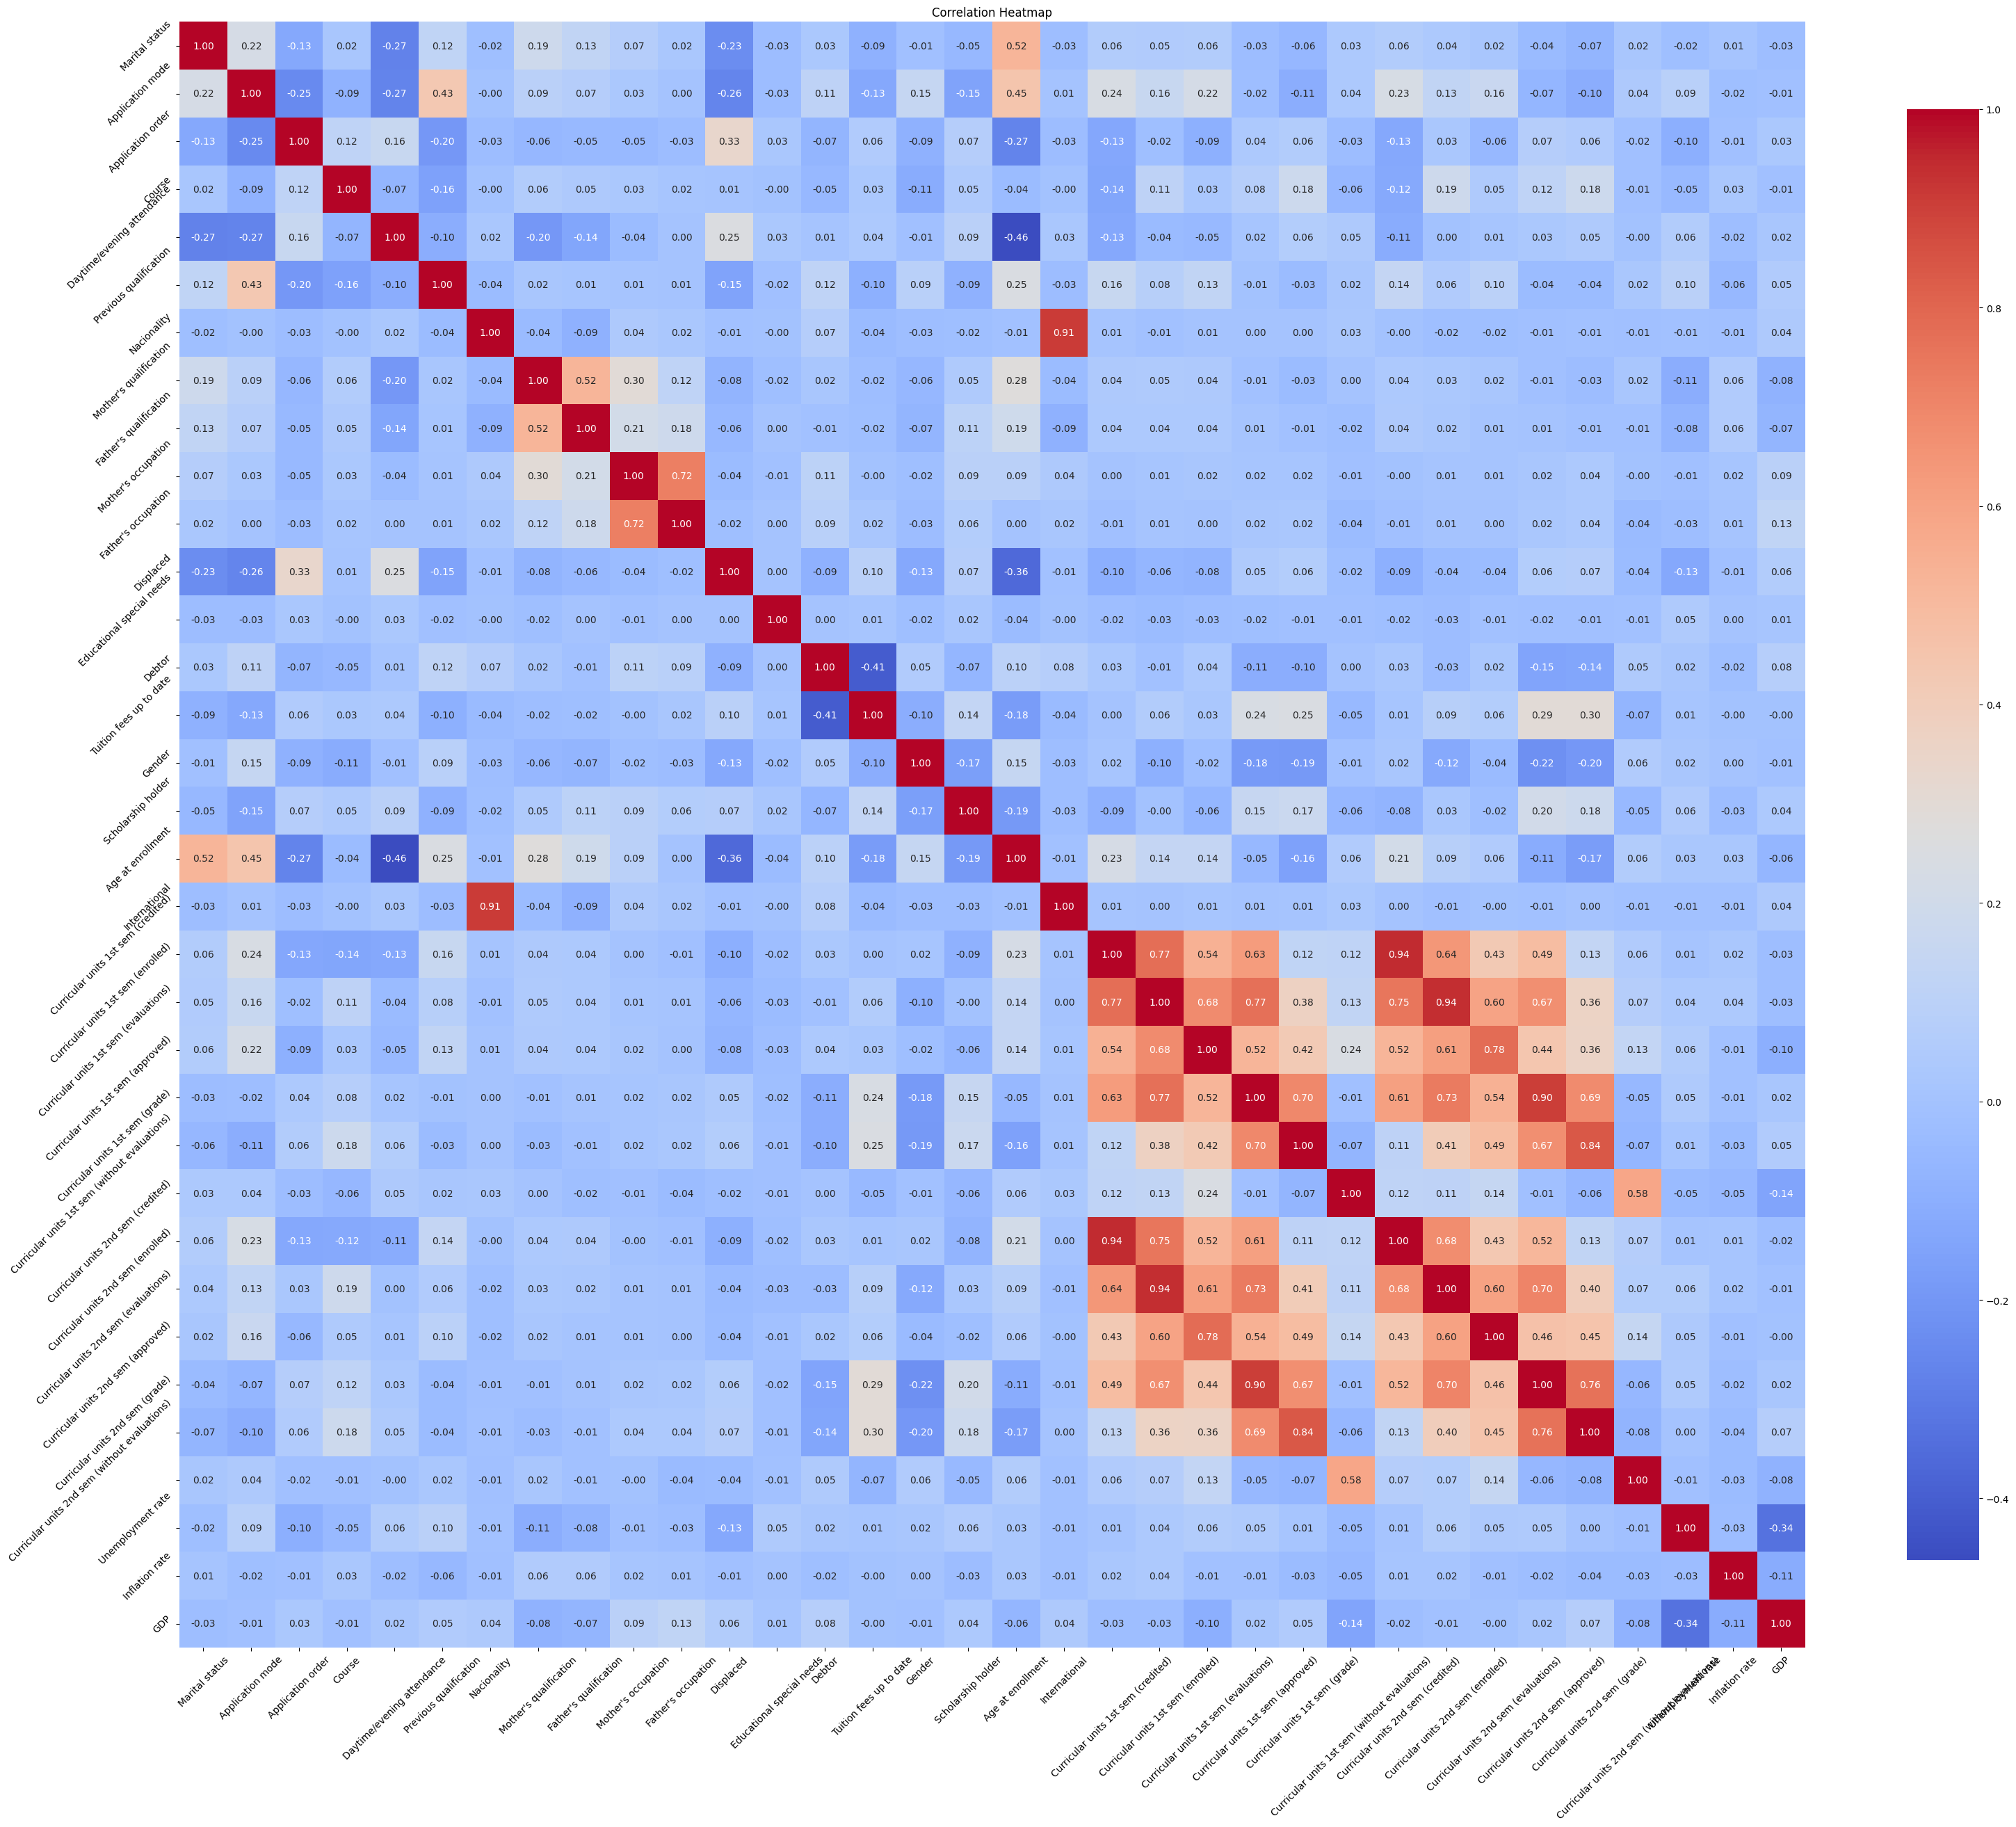

In [14]:
 # Set the size of the heatmap

plt.figure(figsize=(32, 28))

# Create a heatmap

sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels

plt.title('Correlation Heatmap')

plt.xticks(rotation=45)

plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Show the plot

plt.show()

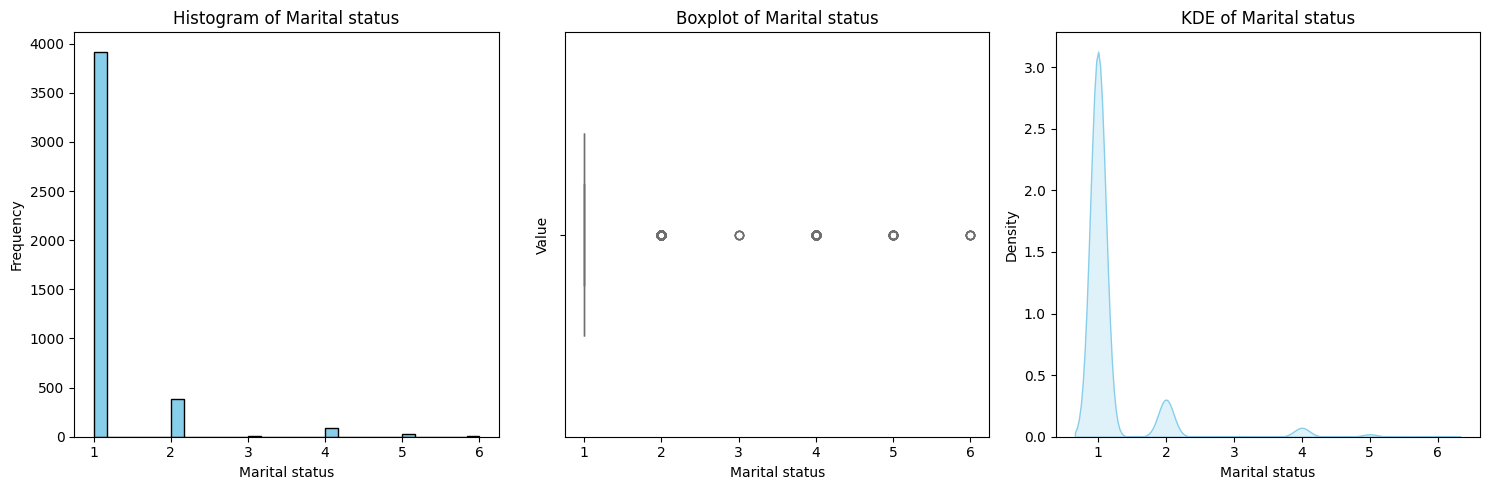

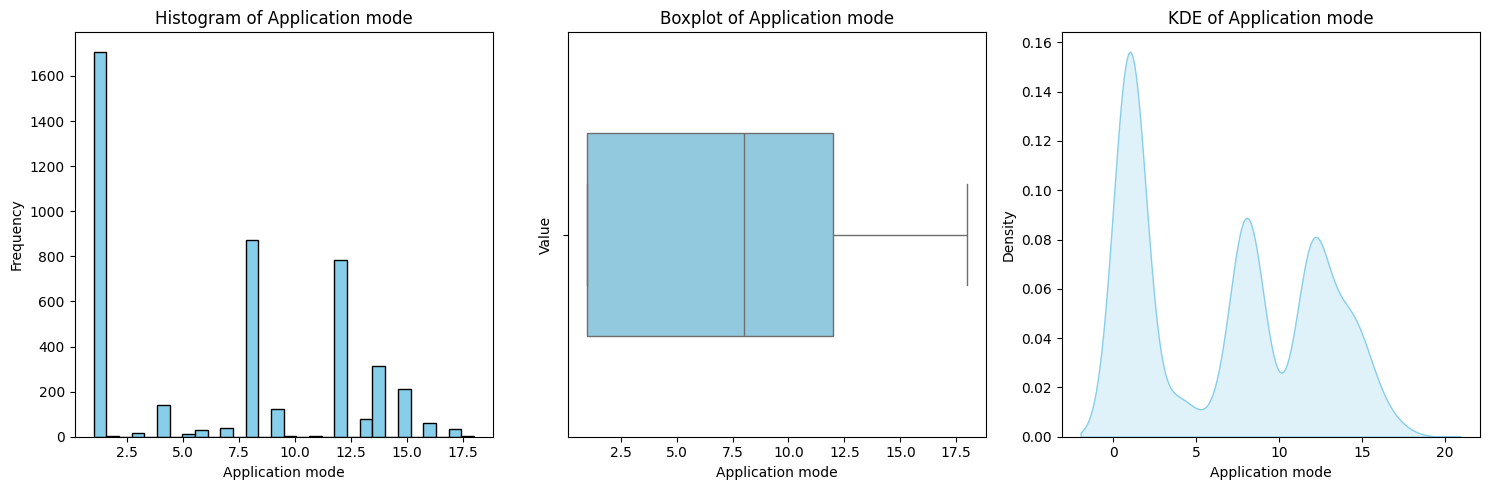

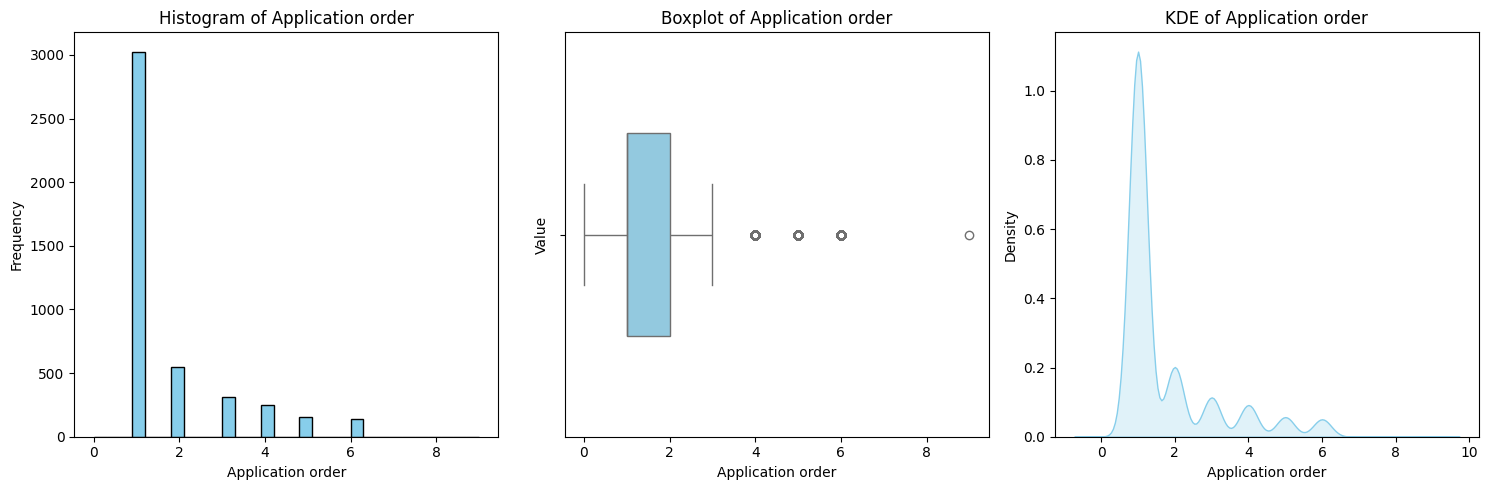

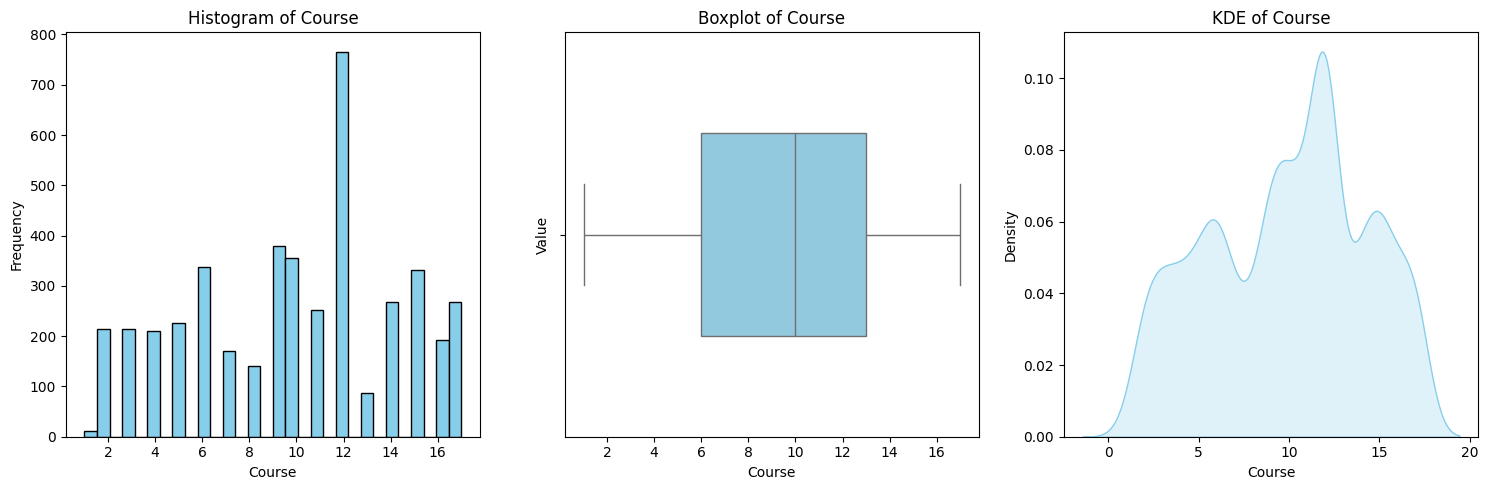

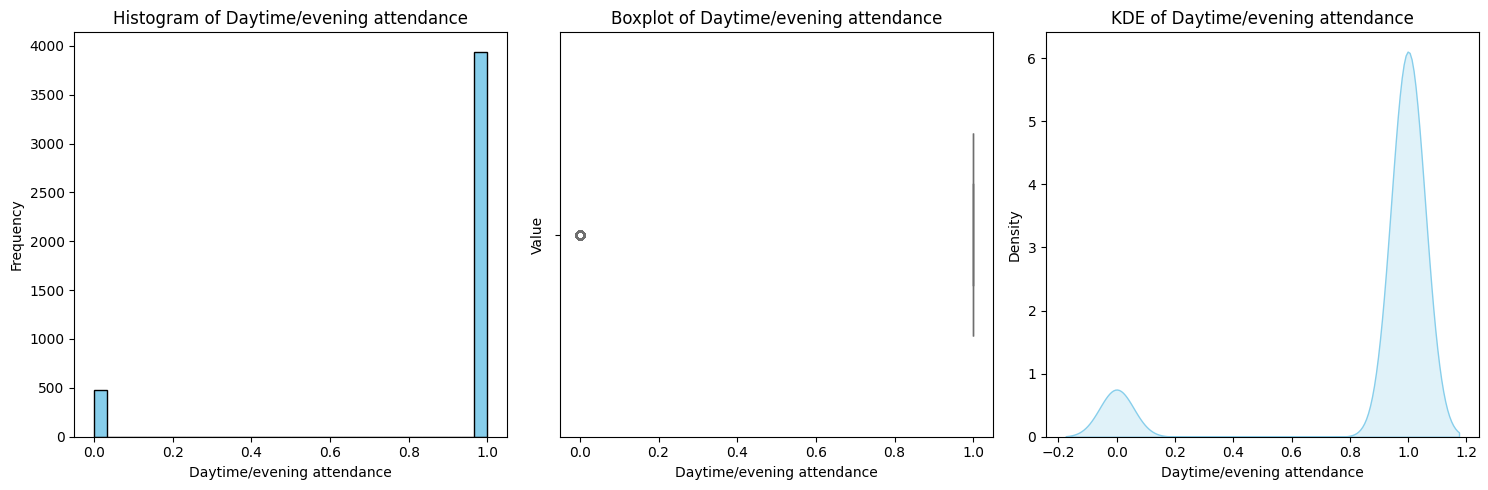

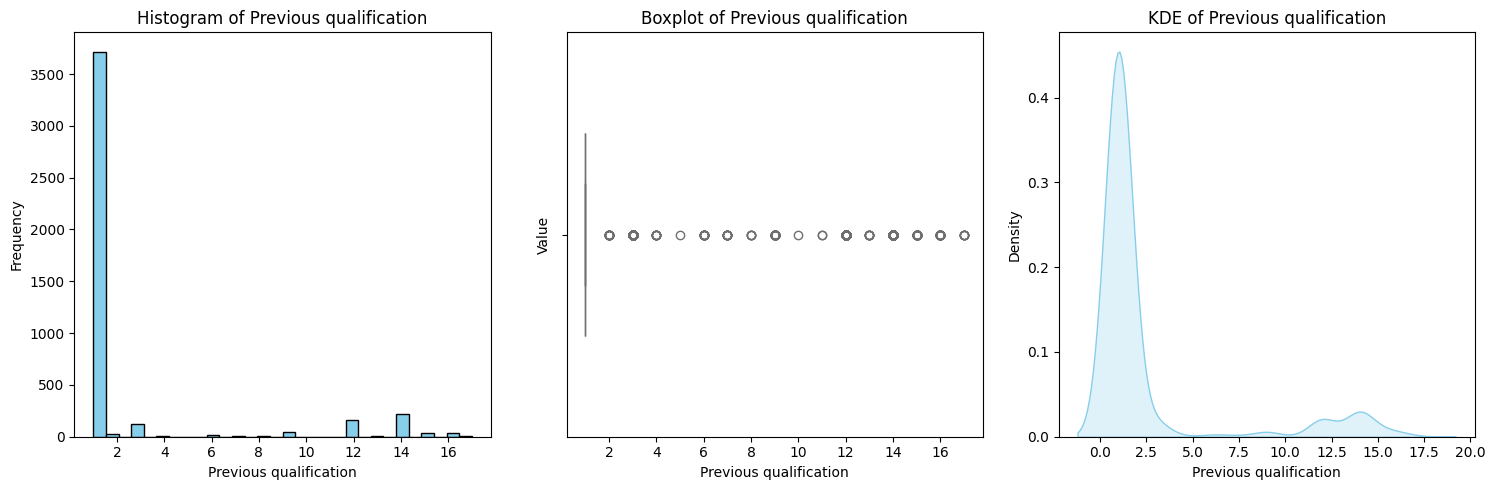

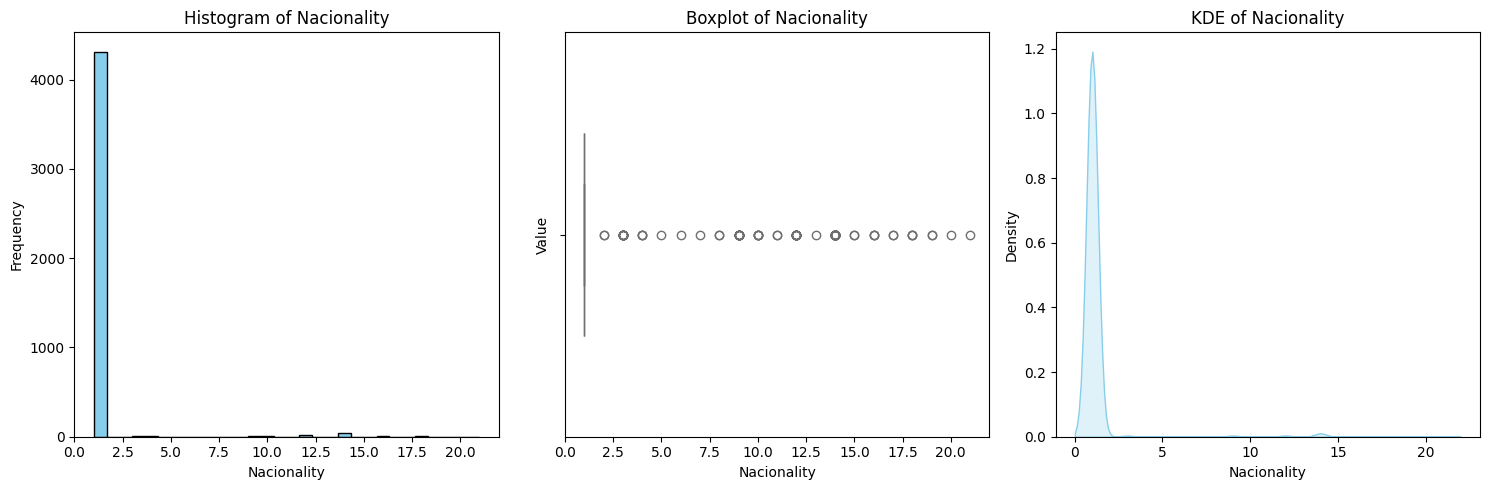

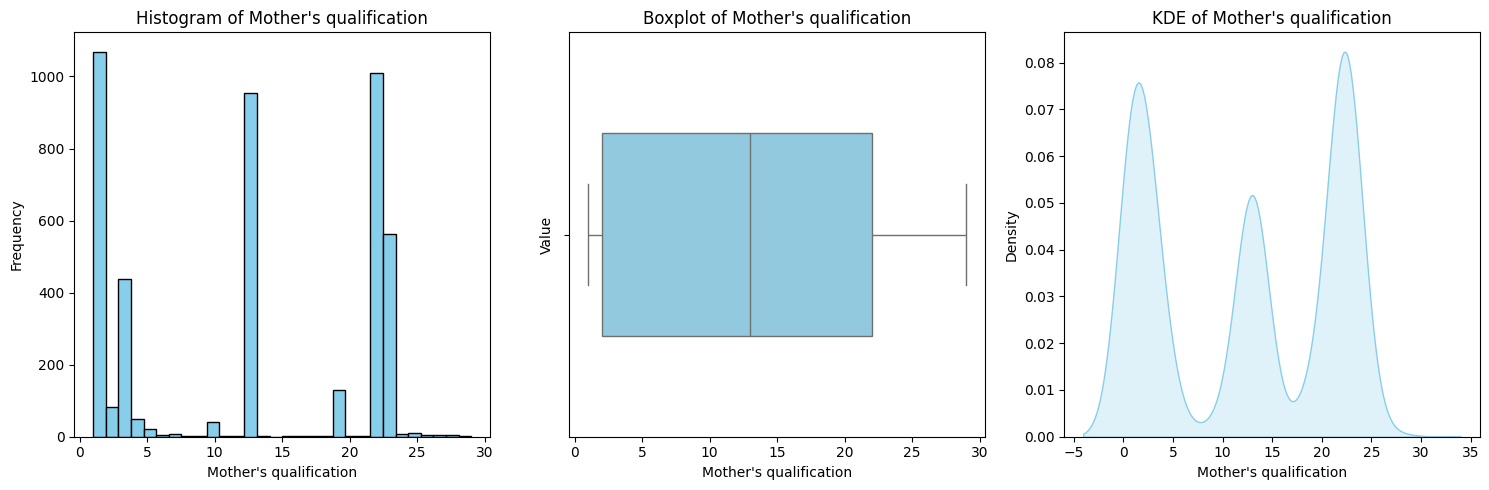

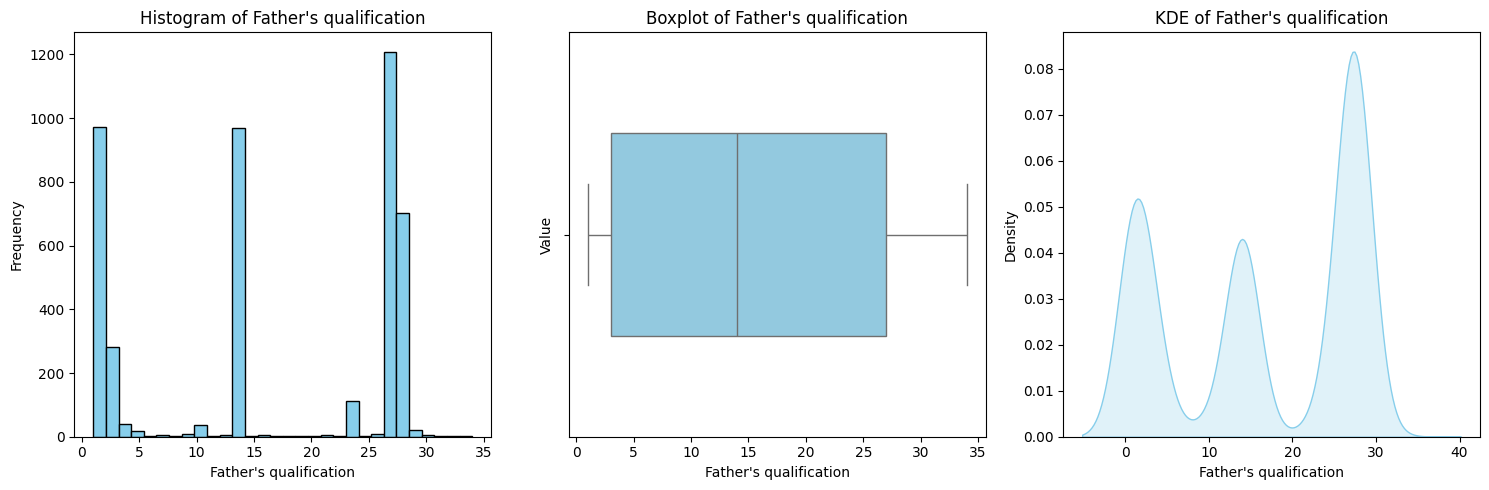

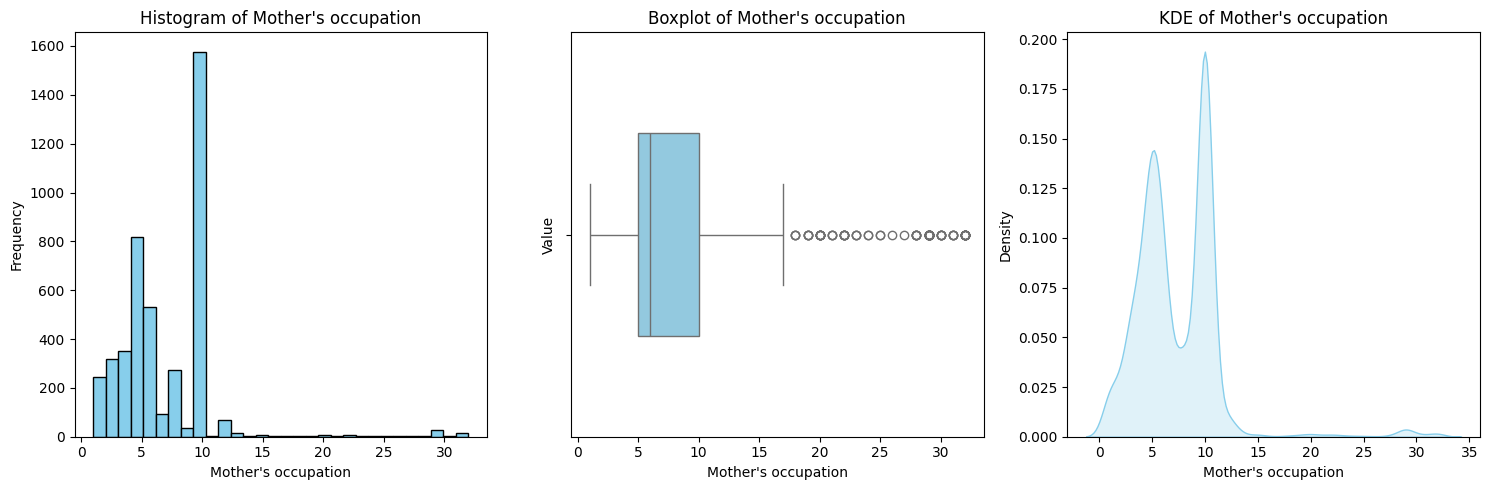

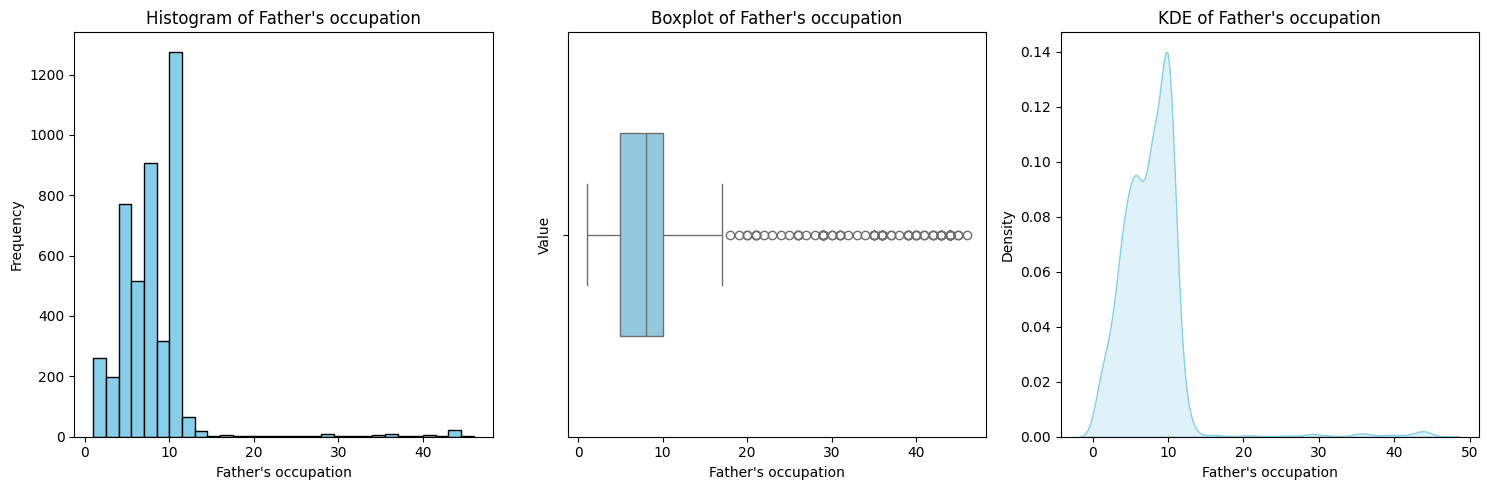

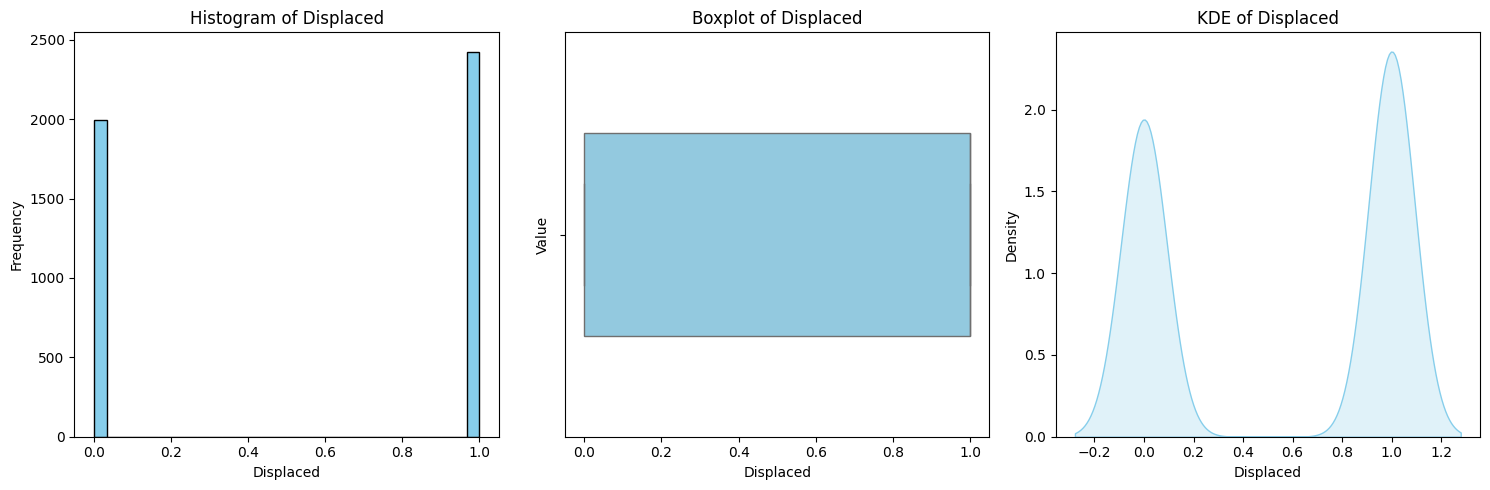

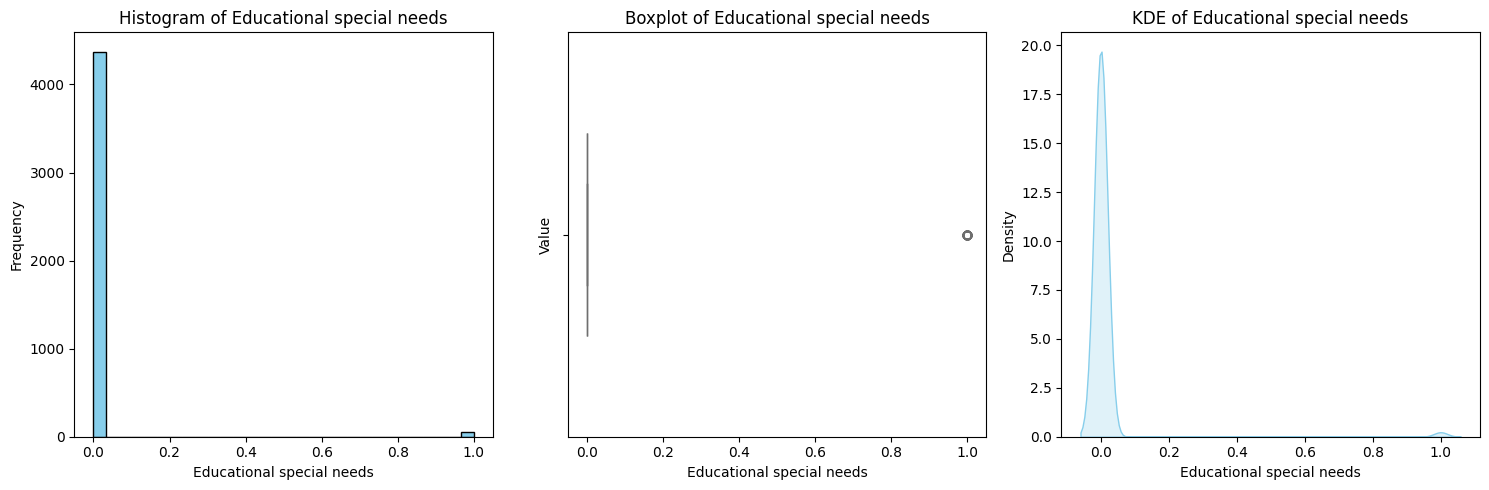

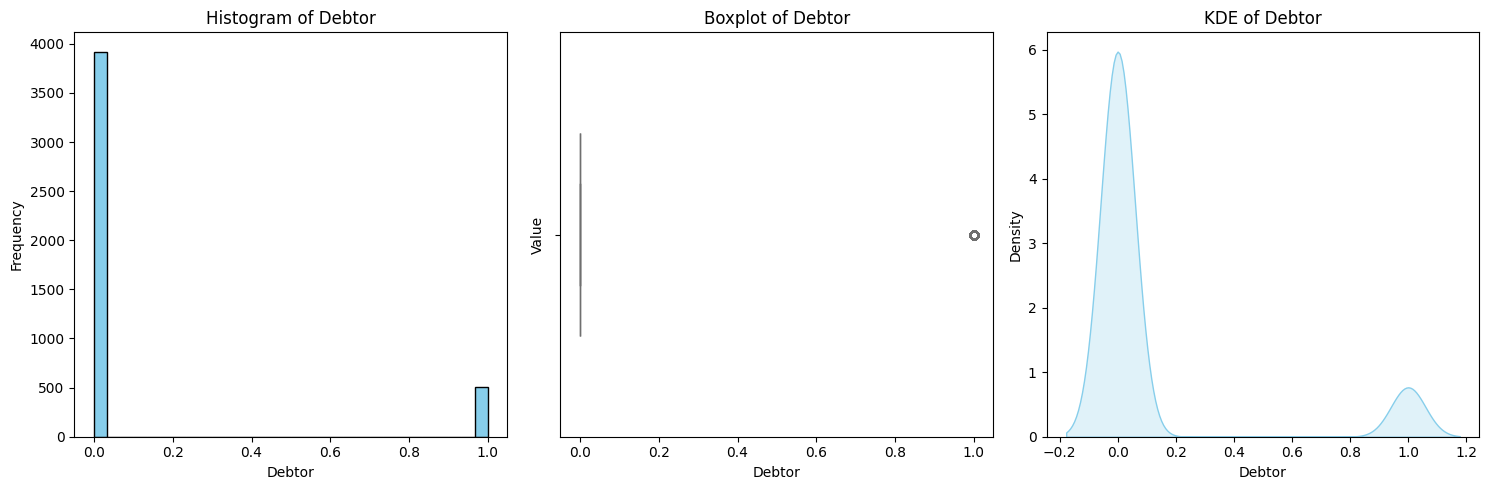

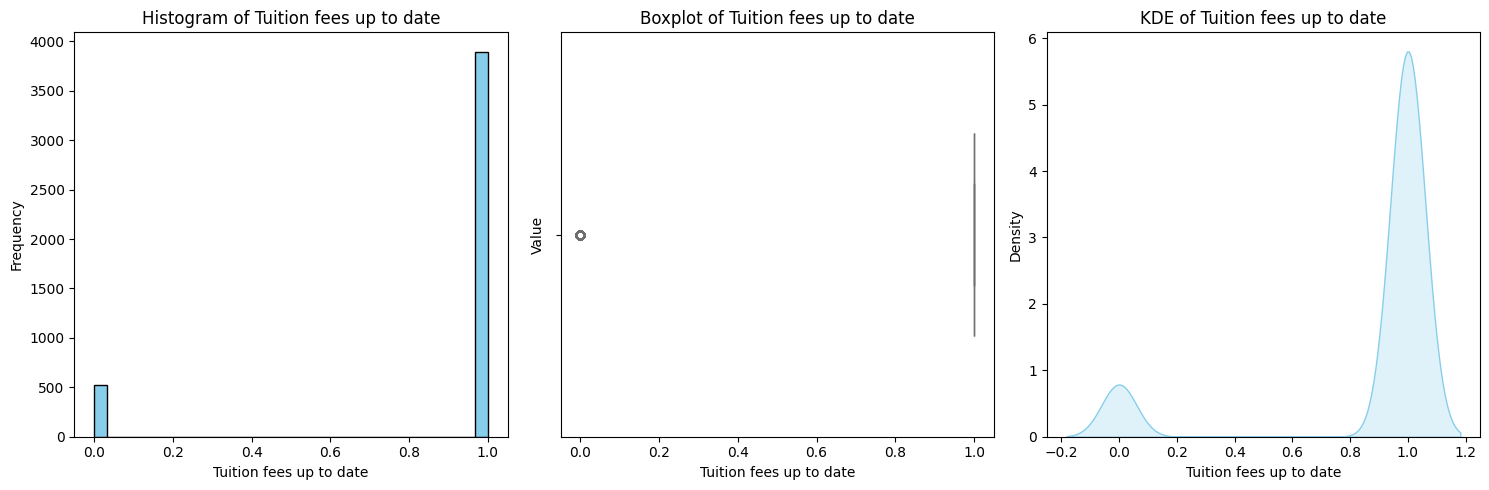

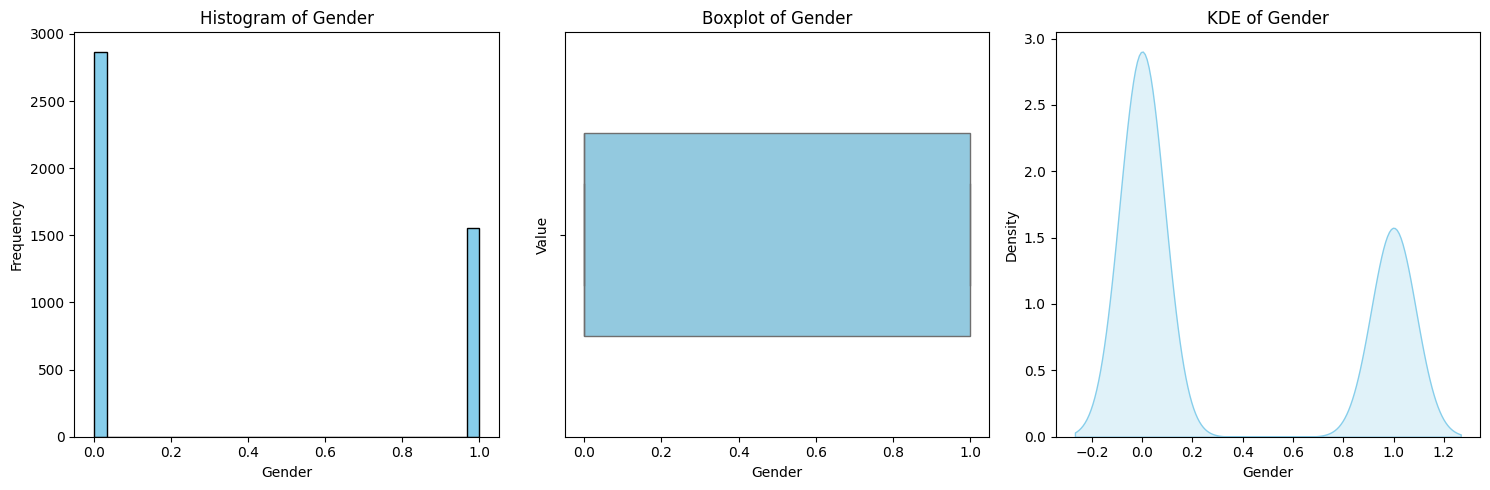

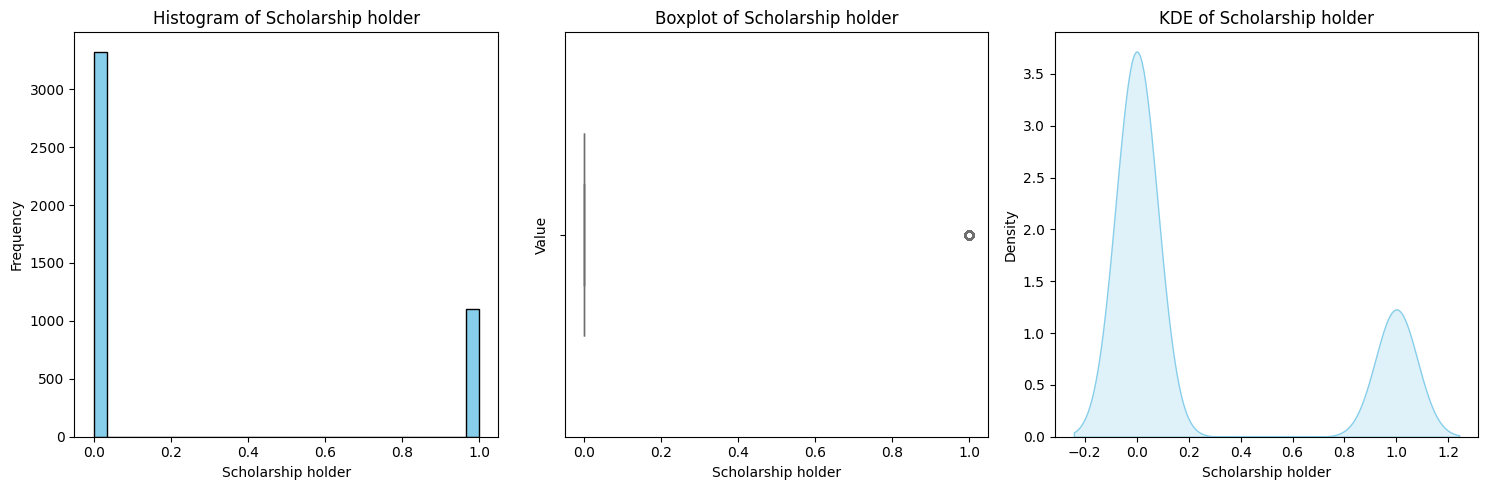

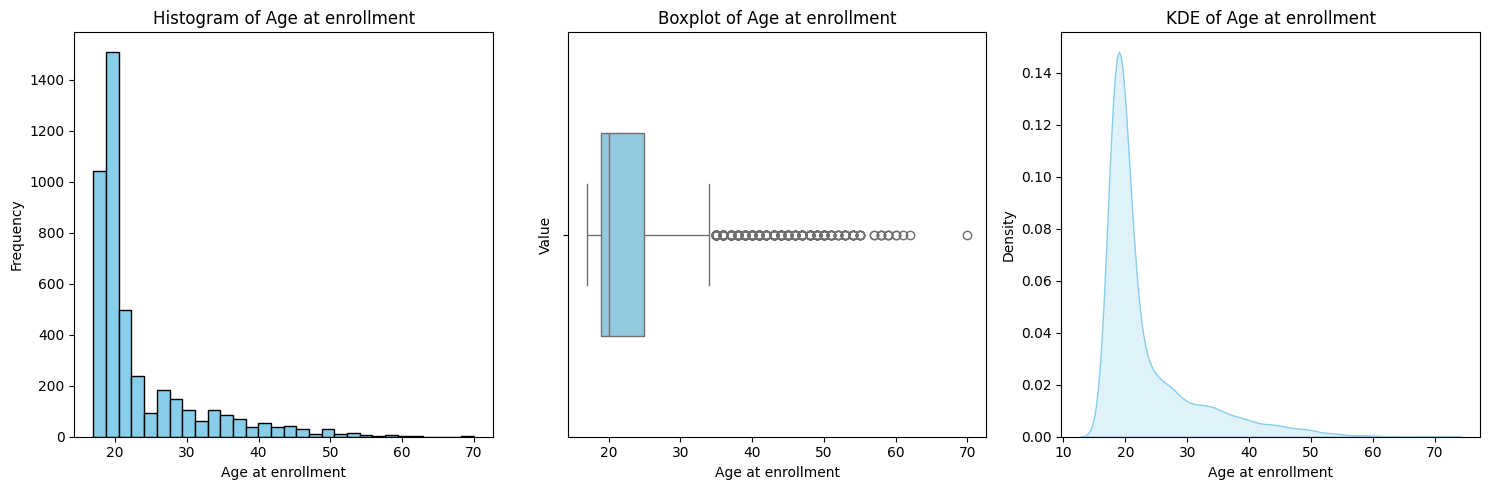

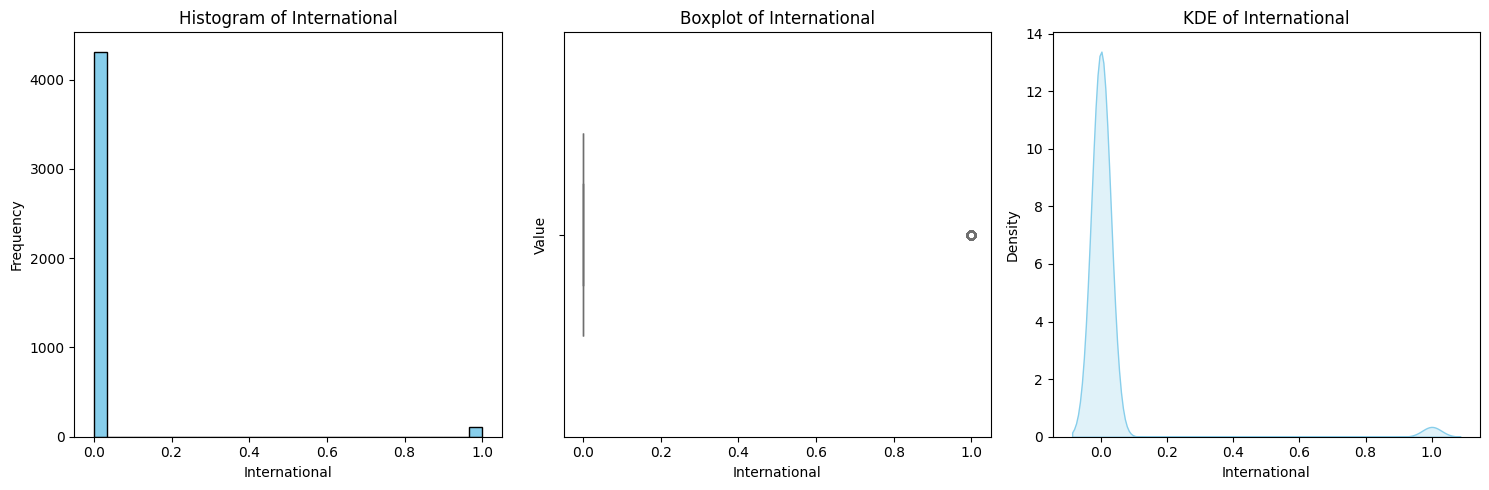

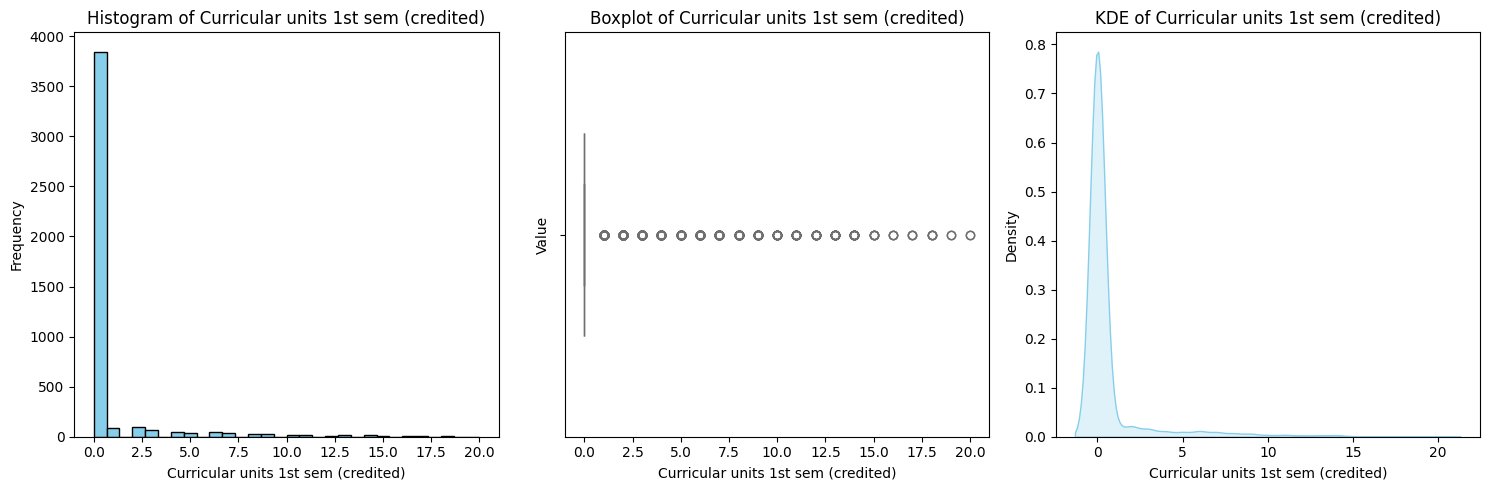

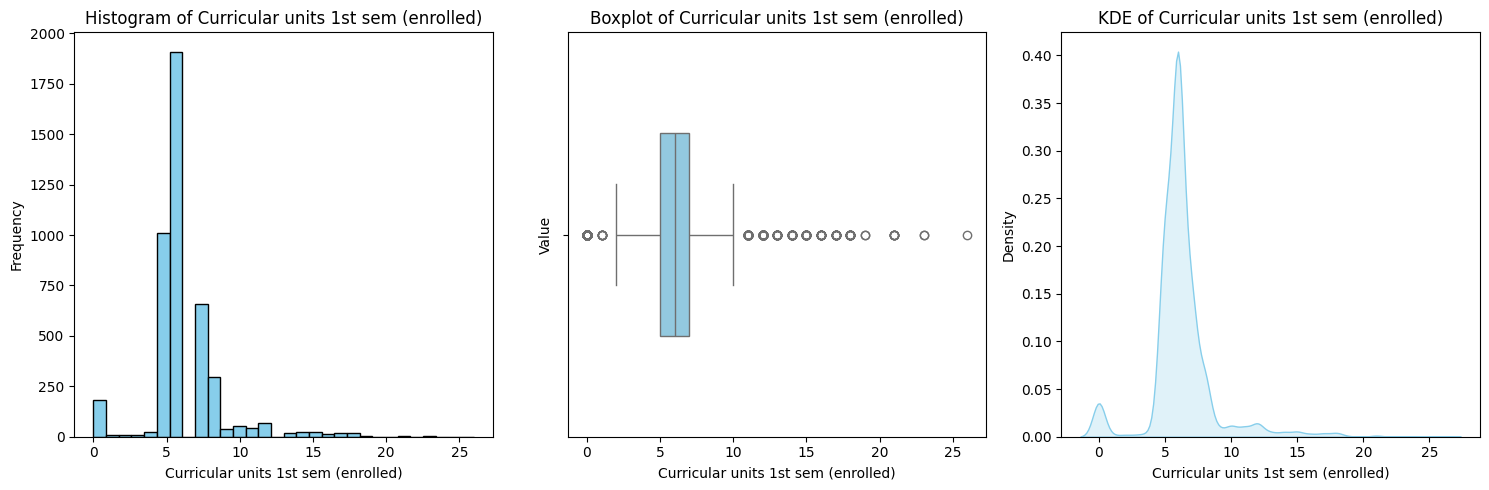

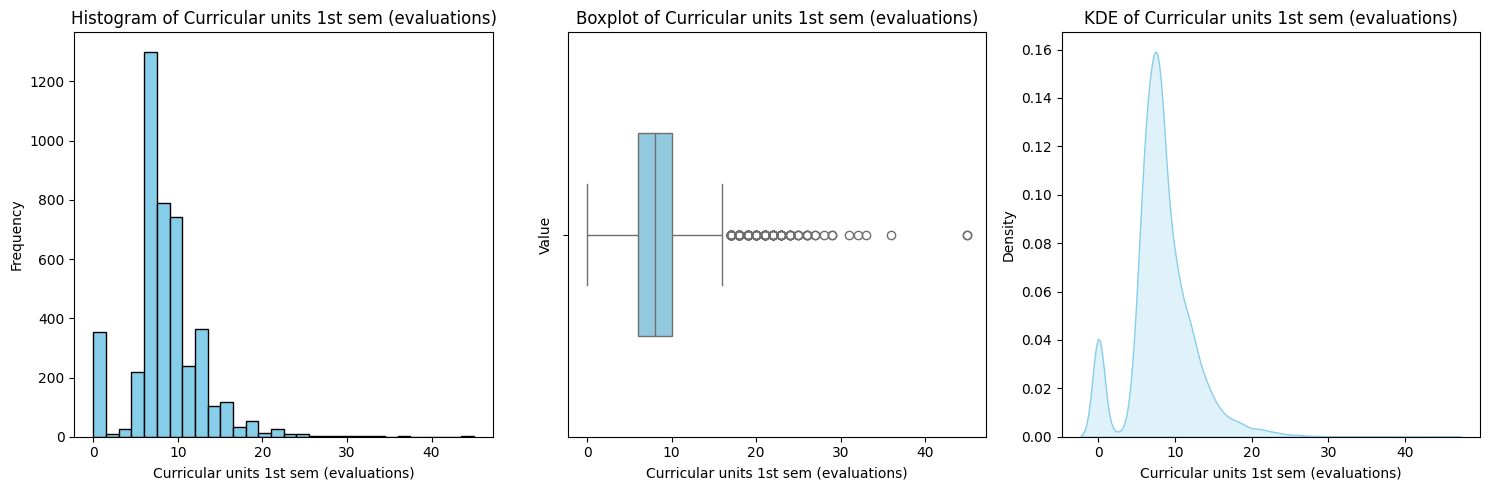

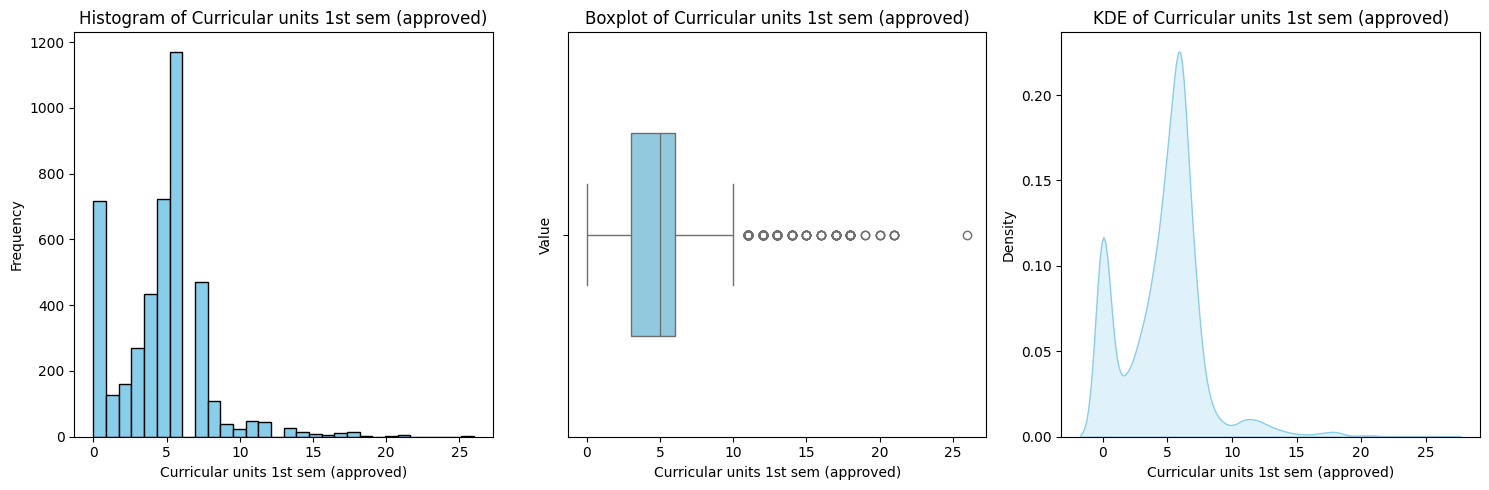

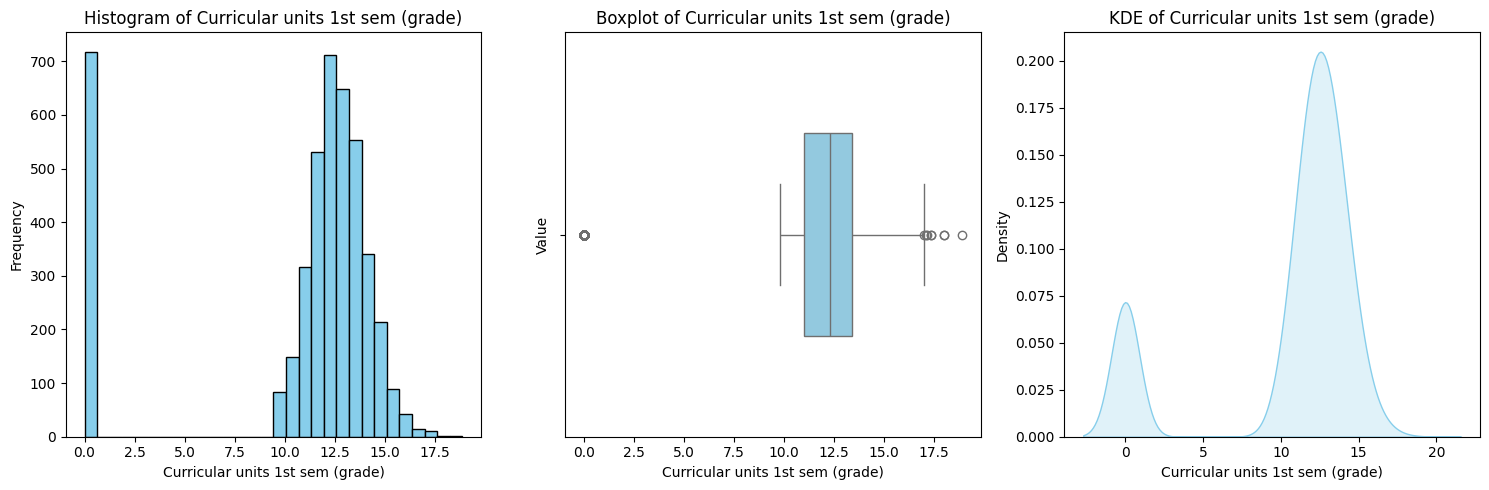

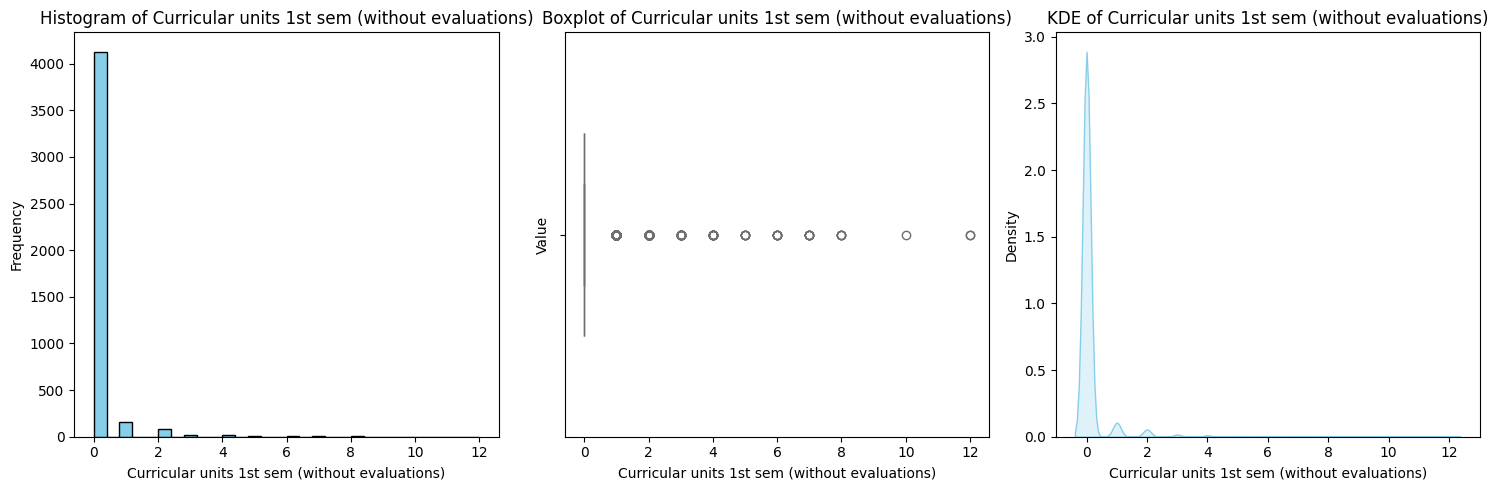

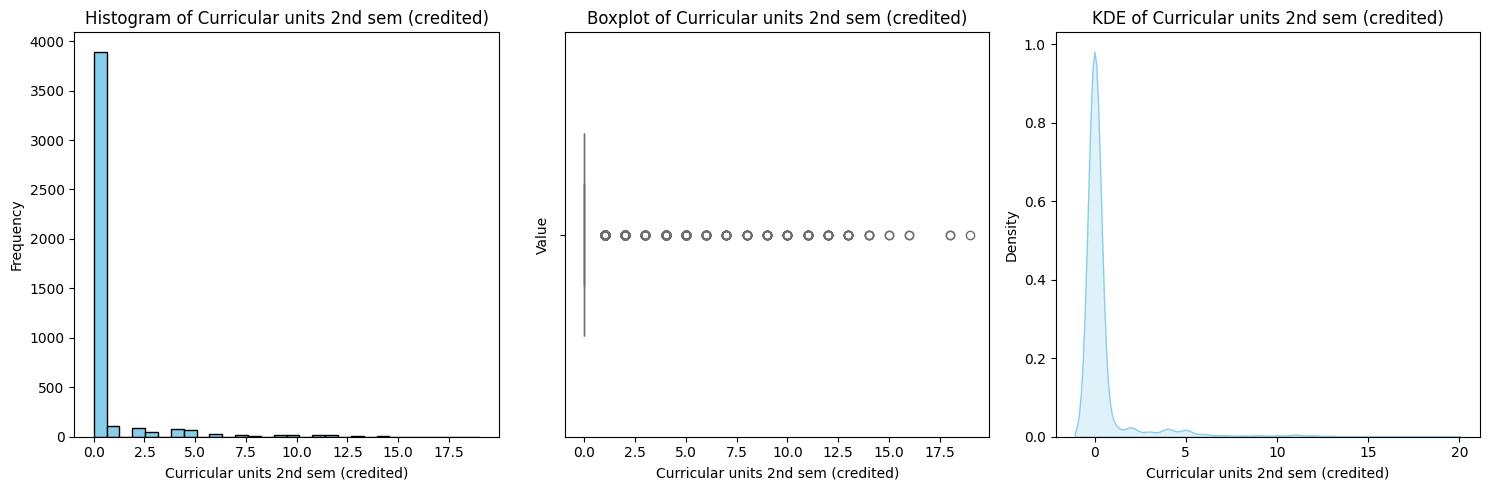

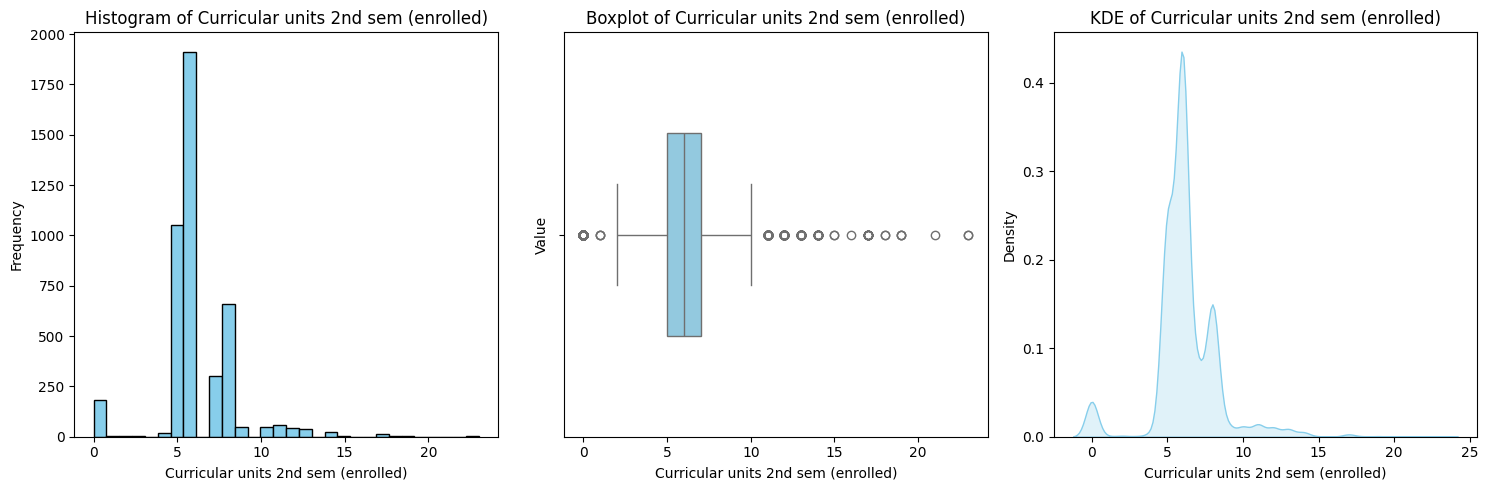

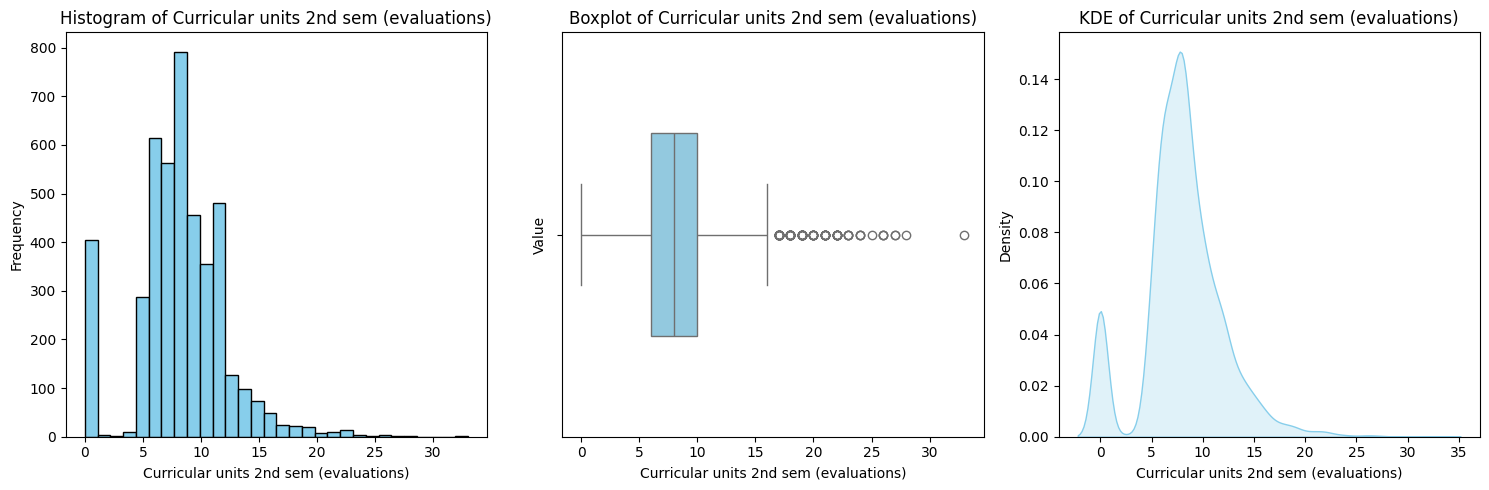

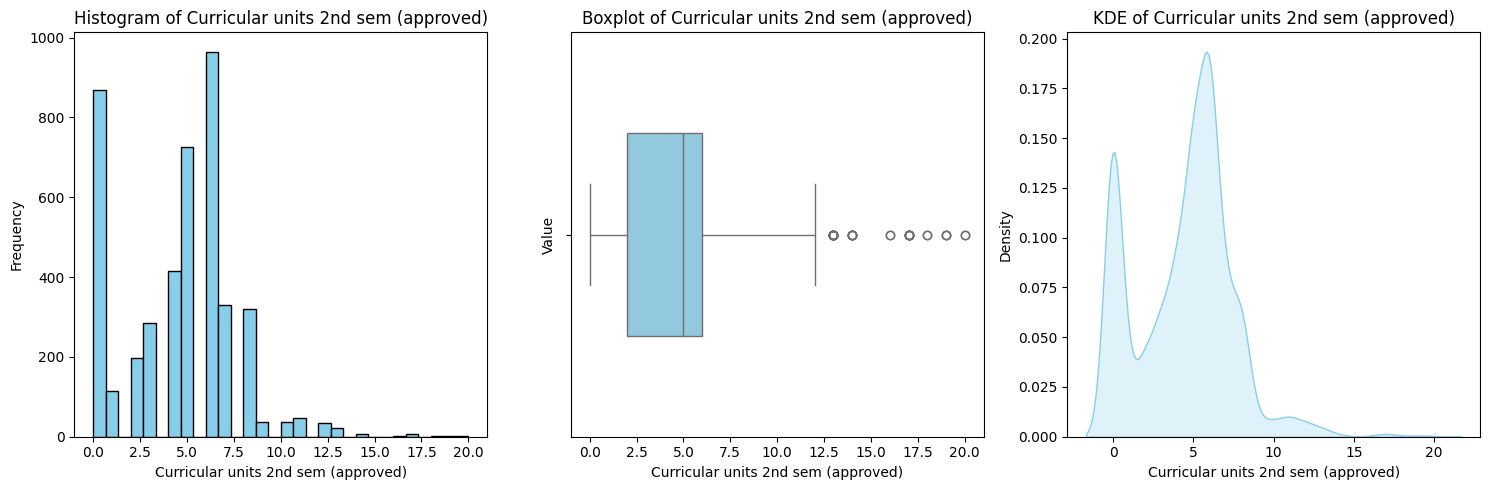

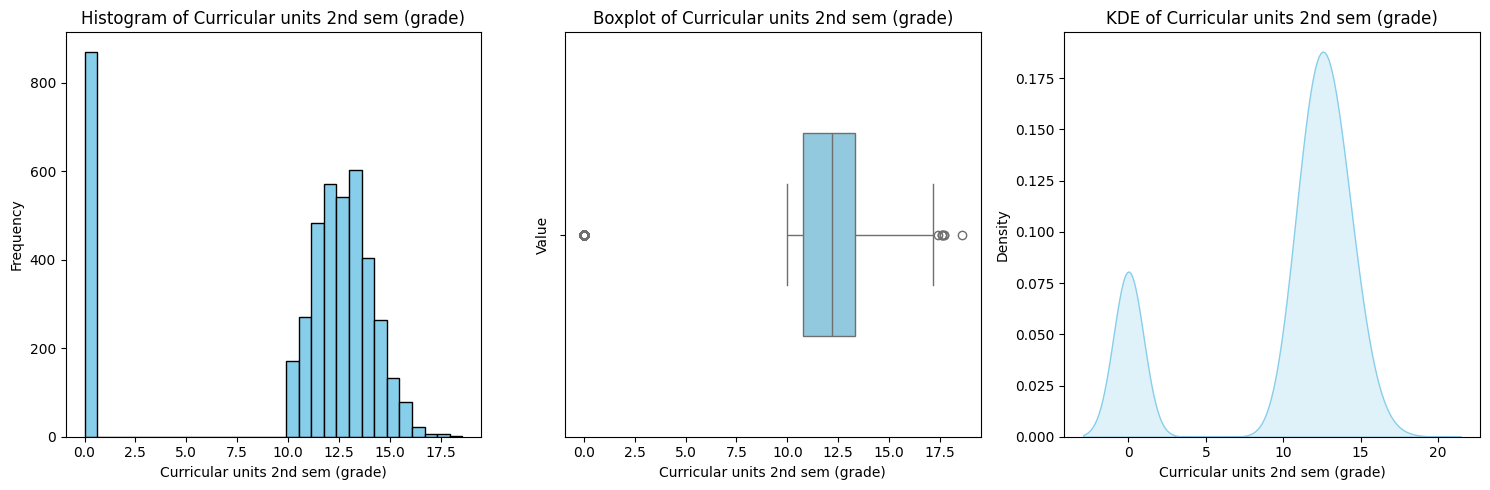

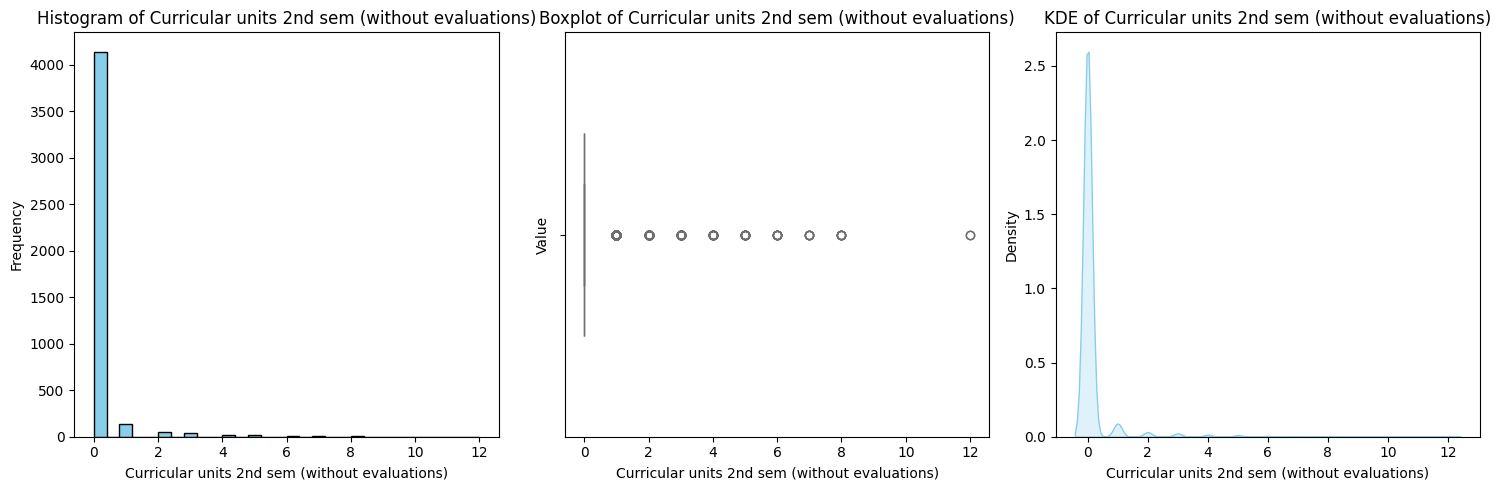

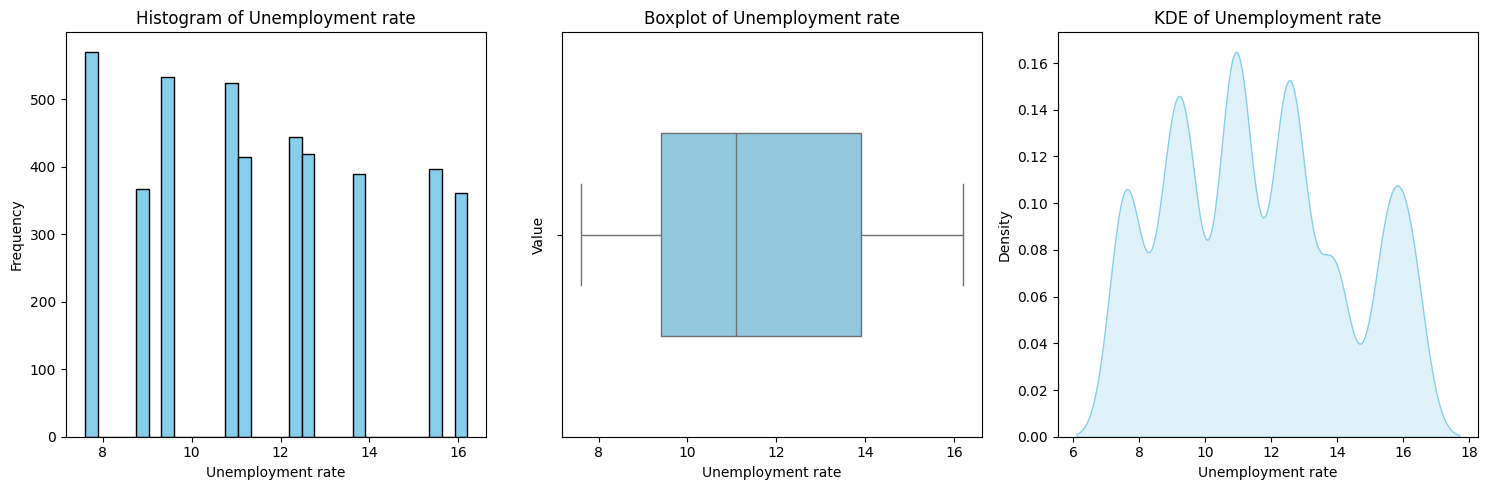

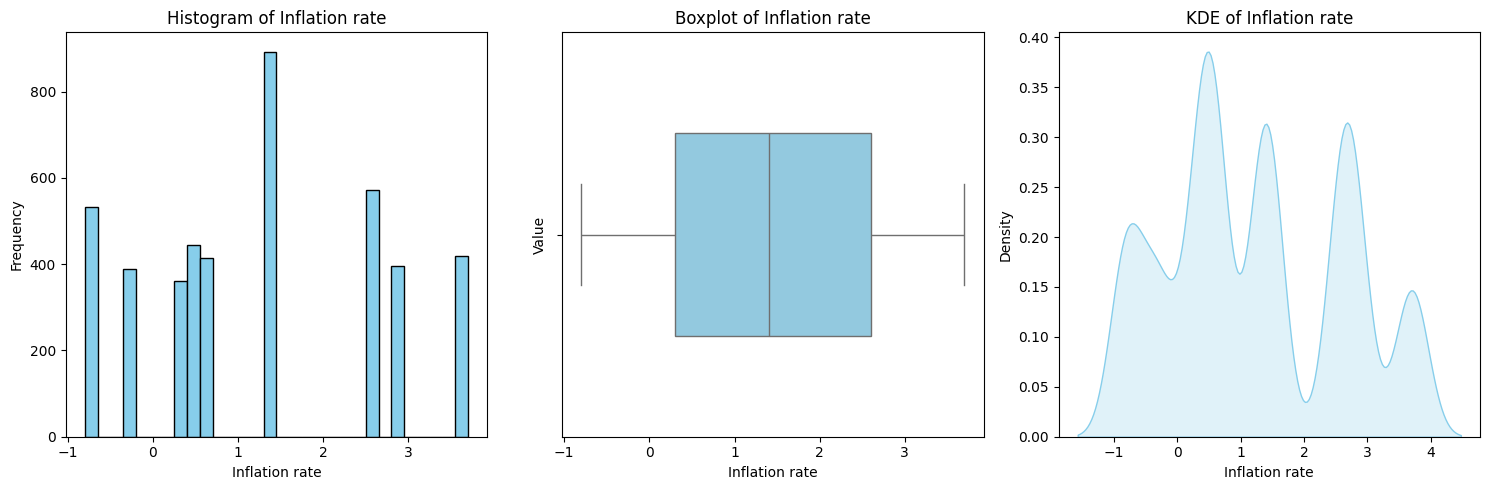

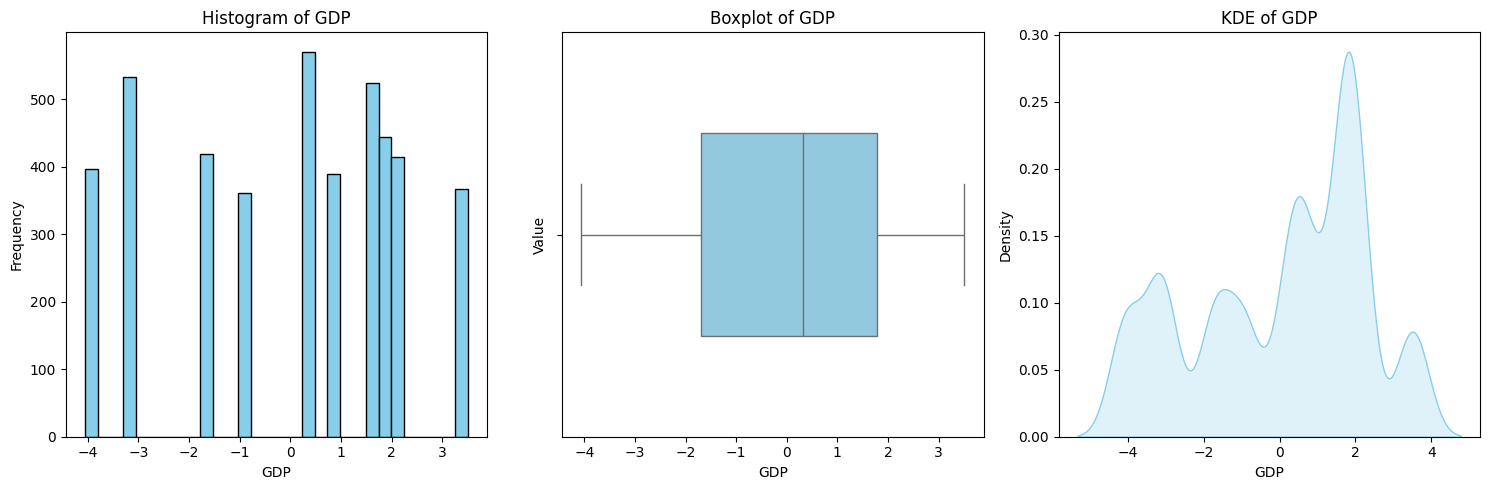

In [15]:
for col in numerical_data[1:]:

    plt.figure(figsize=(15, 5))



    # Histogram

    plt.subplot(1, 3, 1)

    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')

    plt.xlabel(col)

    plt.ylabel('Frequency')

    plt.title(f'Histogram of {col}')



    # Boxplot

    plt.subplot(1, 3, 2)

    sns.boxplot(x=df[col],color='skyblue', width=0.5)

    plt.xlabel(col)

    plt.ylabel('Value')

    plt.title(f'Boxplot of {col}')



    # KDE plot

    plt.subplot(1, 3, 3)

    sns.kdeplot(df[col], color='skyblue', fill=True)

    plt.xlabel(col)

    plt.ylabel('Density')

    plt.title(f'KDE of {col}')



    plt.tight_layout()

    plt.show()

In [16]:
df =  df.replace('Graduate', 'Not Dropout').replace('Enrolled', 'Not Dropout')
df['Target'].unique()

array(['Dropout', 'Not Dropout'], dtype=object)

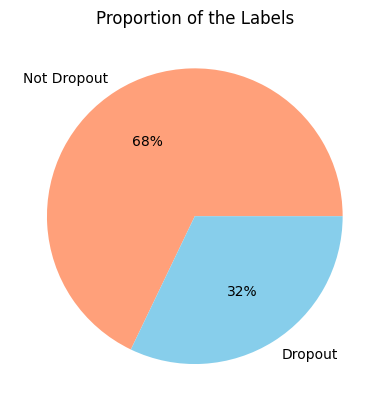

In [17]:
labels = df['Target'].value_counts().index

values = df['Target'].value_counts().values



plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue', 'wheat'], autopct = '%1.0f%%')

plt.title('Proportion of the Labels');

In [18]:
# Target by Marital Status

fig = px.histogram(df, x='Marital status', color='Target', barmode='group', nbins=20, title='Target by Marital Status')

fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count')

fig.show()

In [19]:
# Target by Curricular units 1st sem (grade)

fig = px.histogram(df, x='Curricular units 1st sem (grade)', color='Target', barmode='group', nbins=20, title='Target by 1st Sem Grades')

fig.update_layout(xaxis_title='Curricular Units 1st Sem (Grade)', yaxis_title='Count')

fig.show()

In [20]:
# Target by Previous qualification

fig = px.histogram(df, x='Previous qualification', color='Target', barmode='group', nbins=20, title='Target by Previous qualification')

fig.update_layout(xaxis_title='Previous qualification', yaxis_title='Count')

fig.show()

In [21]:
# Target by Gender

fig = px.histogram(df, x='Gender', color='Target', barmode='group', nbins=20, title='Dropout by Gender')

fig.update_layout(xaxis_title='Gender', yaxis_title='Count')

fig.show()

In [22]:
# Target by Scholarship holder

fig = px.histogram(df, x='Scholarship holder', color='Target', barmode='group', nbins=20, title='Dropout by Scholarship holder')

fig.update_layout(xaxis_title='Scholarship holder', yaxis_title='Count')

fig.show()

# Data Preprocessing

## Encoding

In [23]:
# Mapping qualifications

unique_values = set(df['Previous qualification'].unique().tolist() +

                    df["Mother's qualification"].unique().tolist() +

                    df["Father's qualification"].unique().tolist())



# Create the mapping

value_to_index = {value: idx for idx, value in enumerate(unique_values)}



# Apply the mapping to the relevant columns

df['Previous qualification'] = df['Previous qualification'].map(value_to_index)

df["Mother's qualification"] = df["Mother's qualification"].map(value_to_index)

df["Father's qualification"] = df["Father's qualification"].map(value_to_index)

In [24]:
# Mapping occupations

unique_values = set(df["Mother's occupation"].unique().tolist() +

                    df["Father's occupation"].unique().tolist())



# Create the mapping

value_to_index = {value: idx for idx, value in enumerate(unique_values)}



# Apply the mapping to the relevant columns

df["Mother's occupation"] = df["Mother's occupation"].map(value_to_index)

df["Father's occupation"] = df["Father's occupation"].map(value_to_index)

## Column Reduction

In [25]:
df = df.drop(['Nacionality', 'International', 'Educational special needs'], axis = 1)

In [26]:
df['I/U Ratio']=df['Inflation rate']/df['Unemployment rate']

df.drop(columns=['Inflation rate','Unemployment rate'],inplace=True)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

df =  df.replace('Dropout', 0).replace('Not Dropout', 1)
df['Target'].unique()

<ipython-input-27-5ffcc79c5e5e>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



array([0, 1])

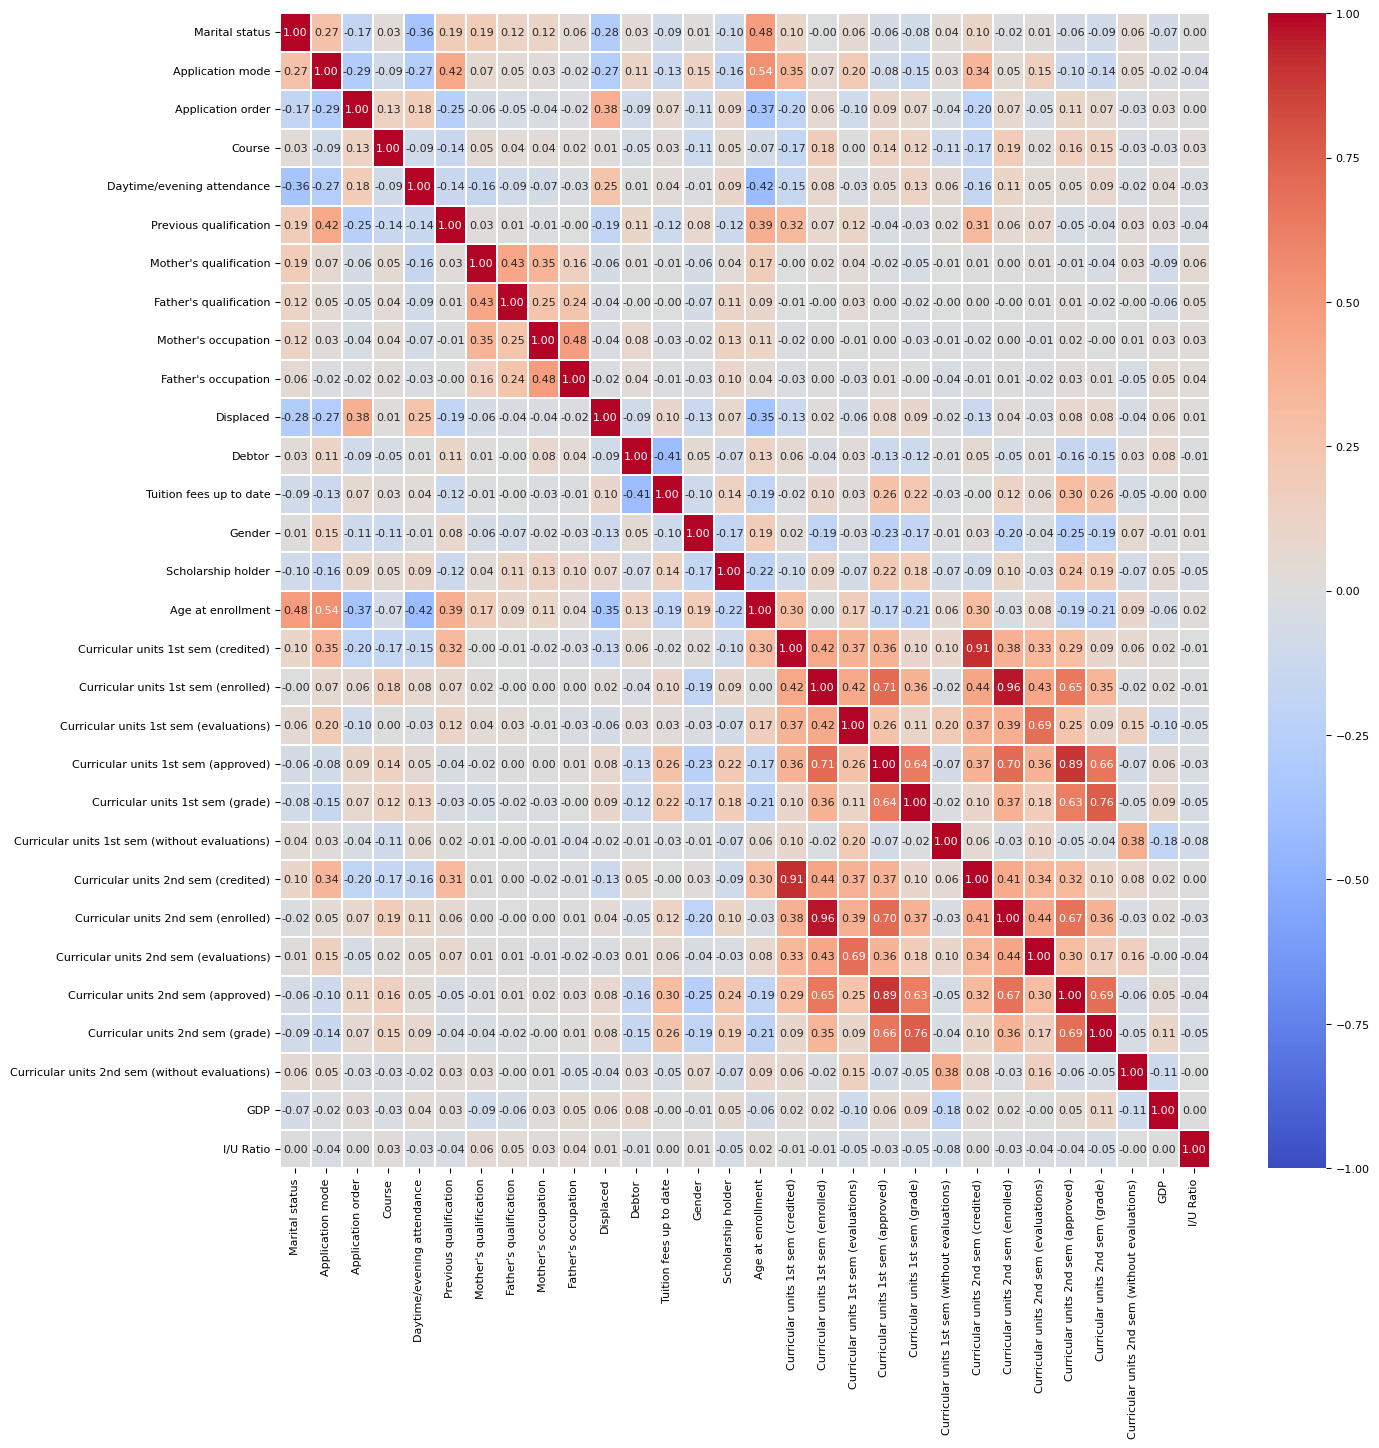

In [28]:
plt.figure(figsize = (15, 15))

plt.rcParams.update({'font.size': 8})

sns.heatmap(df.drop('Target', axis = 1).corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,

            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

In [29]:
# strongest 3 correlations
df.corr()['Target'].sort_values(ascending=False)[1:4]

Curricular units 2nd sem (grade)       0.571792
Curricular units 2nd sem (approved)    0.569500
Curricular units 1st sem (grade)       0.480669
Name: Target, dtype: float64

In [30]:
df['Curricular units avg credited'] = df[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].mean(axis = 1)

df['Curricular avg enrolled'] = df[['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']].mean(axis=1)

df['Curricular avg evaluations'] = df[['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']].mean(axis=1)

df['Curricular avg approved'] = df[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']].mean(axis=1)

df['Curricular avg grade'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

df['Curricular avg without evaluations'] = df[['Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']].mean(axis=1)

In [31]:
df.drop(columns=[
            'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (without evaluations)'
            ],inplace=True)

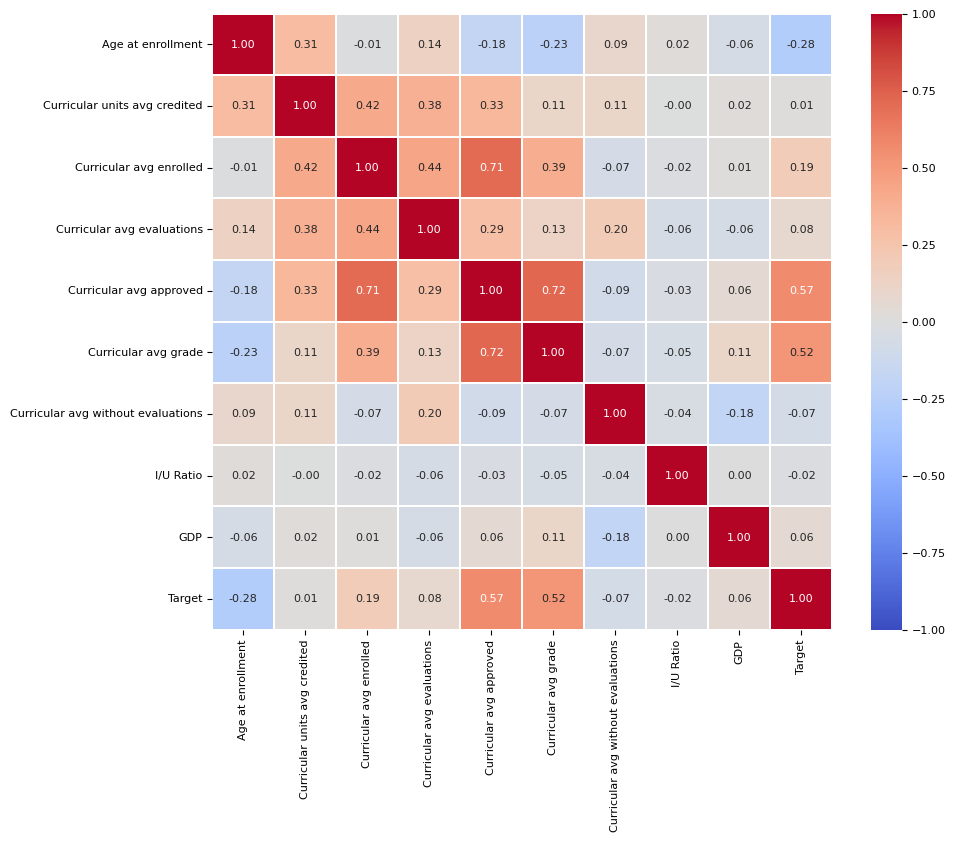

In [32]:
num_features = df[['Age at enrollment', 'Curricular units avg credited', 'Curricular avg enrolled',

                              'Curricular avg evaluations', 'Curricular avg approved',

                              'Curricular avg grade', 'Curricular avg without evaluations', 'I/U Ratio',

                              'GDP', 'Target']]



plt.figure(figsize = (10, 8))

plt.rcParams.update({'font.size': 8})

sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,

            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

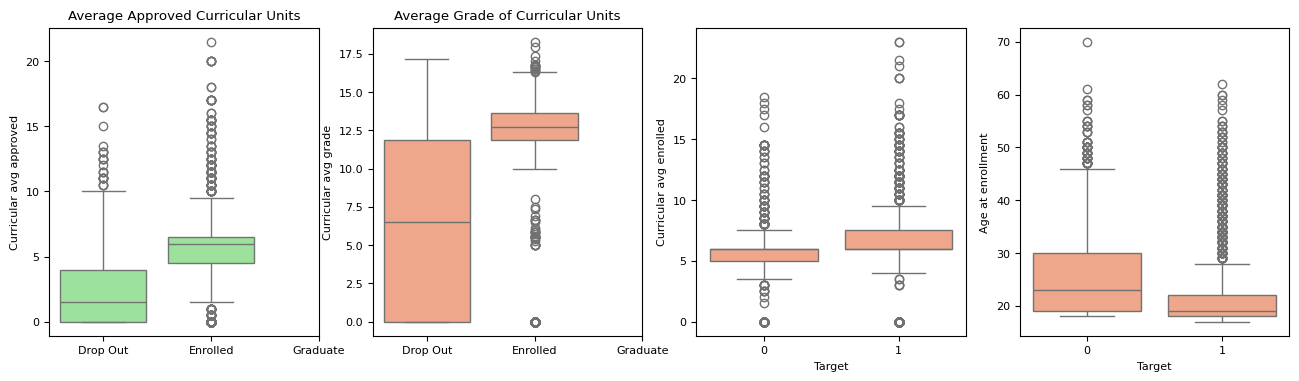

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))

sns.boxplot(data = df, x = 'Target', y = 'Curricular avg approved',

            color = 'lightgreen', ax = ax1)

ax1.set_title('Average Approved Curricular Units')

ax1.set_xlabel("")

ax1.set_xticks([0, 1, 2])

ax1.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);



sns.boxplot(data = df, x = 'Target', y = 'Curricular avg grade',

            color = 'lightsalmon', ax = ax2)

ax2.set_title('Average Grade of Curricular Units')

ax2.set_xlabel("")

ax2.set_xticks([0, 1, 2])

ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);





sns.boxplot(data = df, x = 'Target', y = 'Curricular avg enrolled',

            color = 'lightsalmon', ax = ax3)

ax2.set_title('Average Grade of Curricular Units')

ax2.set_xlabel("")

ax2.set_xticks([0, 1, 2])

ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);



sns.boxplot(data = df, x = 'Target', y = 'Age at enrollment',

            color = 'lightsalmon', ax = ax4)

ax2.set_title('Average Grade of Curricular Units')

ax2.set_xlabel("")

ax2.set_xticks([0, 1, 2])

ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

## Outliars

In [34]:
# Outliar: The graduaded students shouldn't have 0 credits

df = df.drop(df.loc[(df['Curricular avg approved'] == 0) & (df['Target'] == 2)].index)

df = df.drop(df.loc[(df['Curricular avg enrolled'] == 0) & (df['Target'] == 2)].index)

df = df.drop(df.loc[(df['Curricular avg grade'] == 0) & (df['Target'] == 2)].index)

## Skewness

In [35]:
skewed_features = {}

skewed_columns = []



for feature in df.columns:

    skewness = df[feature].skew()

    skewed_features[feature] = skewness

    if skewness > 0.5:

        print(f"{feature} is right skewed with skewness: {skewness}")



for feature in df.columns:

    if skewed_features[feature] > 0.5:

        skewed_columns.append(feature)

        df[feature] = np.log1p(df[feature])



print("Log transformation applied to right-skewed features.")

Marital status is right skewed with skewness: 4.399764349657625
Application order is right skewed with skewness: 1.8810499569187527
Previous qualification is right skewed with skewness: 2.405934240863601
Mother's occupation is right skewed with skewness: 2.2312274952486795
Father's occupation is right skewed with skewness: 4.058406733918493
Debtor is right skewed with skewness: 2.4346522339392225
Gender is right skewed with skewness: 0.6212791167838527
Scholarship holder is right skewed with skewness: 1.164870855478664
Age at enrollment is right skewed with skewness: 2.0549883694238757
Curricular units avg credited is right skewed with skewness: 4.344500762154784
Curricular avg enrolled is right skewed with skewness: 1.165210674700408
Curricular avg approved is right skewed with skewness: 0.5249980603897674
Curricular avg without evaluations is right skewed with skewness: 8.280122434228328
Log transformation applied to right-skewed features.


# Modeling

In [36]:
Conclusions = []

Conclusions.append(['Model Name', 'Train','Validion' , 'Test'])



def Evaluate(model_name, y_train_pred, y_val_pred, y_test_pred, y_test):

  accuracy_train = accuracy_score(y_train, y_train_pred)

  accuracy_val = accuracy_score(y_val, y_val_pred)

  accuracy_test = accuracy_score(y_test, y_test_pred)



  # Accuracy Scores

  print(f"Train Accuracy: {accuracy_train}")

  print(f"Validation Accuracy: {accuracy_val}")

  print(f"Test Accuracy: {accuracy_test}")



  # Classification Reports

  print("=================================================================================================")

  print("Classification Report for Train Set:\n", classification_report(y_train, y_train_pred, zero_division=0))

  print("=================================================================================================")

  print("Classification Report for Validation Set:\n", classification_report(y_val, y_val_pred, zero_division=0))

  print("=================================================================================================")

  print("Classification Report for Test Set:\n", classification_report(y_test, y_test_pred, zero_division=0))

  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

  return [model_name, accuracy_train, accuracy_val, accuracy_test]

## Split and Scall

In [37]:
X = df.drop('Target', axis=1)

y = df['Target']



X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# y_train = y_train.replace([0, 2], [1, 0])

# y_val = y_val.replace([0, 2], [1, 0])

# y_test = y_test.replace([0, 2], [1, 0])



from sklearn.preprocessing import StandardScaler , RobustScaler

Standard = StandardScaler()



X_train = pd.DataFrame(Standard.fit_transform(X_train),columns=X_train.columns)

X_val = pd.DataFrame(Standard.fit_transform(X_val),columns=X_train.columns)

X_test = pd.DataFrame(Standard.fit_transform(X_test),columns=X_train.columns)

## Logistic Regression

Train Accuracy: 0.8746770025839793
Validation Accuracy: 0.8614457831325302
Test Accuracy: 0.8539156626506024
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       980
           1       0.87      0.96      0.91      2116

    accuracy                           0.87      3096
   macro avg       0.88      0.83      0.85      3096
weighted avg       0.88      0.87      0.87      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       231
           1       0.85      0.96      0.90       433

    accuracy                           0.86       664
   macro avg       0.87      0.82      0.84       664
weighted avg       0.86      0.86      0.86       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75       210
          

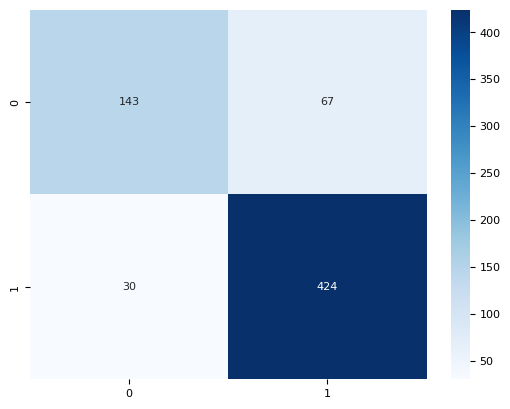

In [38]:
log_reg_model = LogisticRegression(max_iter=10000)

log_reg_model.fit(X_train, y_train)



y_train_pred = log_reg_model.predict(X_train)

y_val_pred = log_reg_model.predict(X_val)

y_test_pred = log_reg_model.predict(X_test)



Conclusions.append(Evaluate('Logistic Regression', y_train_pred, y_val_pred, y_test_pred, y_test))

## KNN

Train Accuracy: 0.8527131782945736
Validation Accuracy: 0.8192771084337349
Test Accuracy: 0.8373493975903614
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.91      0.59      0.72       980
           1       0.84      0.97      0.90      2116

    accuracy                           0.85      3096
   macro avg       0.88      0.78      0.81      3096
weighted avg       0.86      0.85      0.84      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67       231
           1       0.79      0.98      0.88       433

    accuracy                           0.82       664
   macro avg       0.86      0.75      0.77       664
weighted avg       0.84      0.82      0.80       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.84      0.60      0.70       210
          

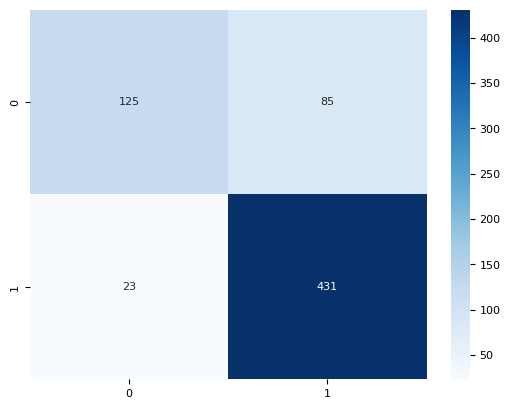

In [39]:
from sklearn.metrics import classification_report



knn_model = KNeighborsClassifier(n_neighbors=11)

knn_model.fit(X_train, y_train)



y_train_pred = knn_model.predict(X_train)

y_val_pred = knn_model.predict(X_val)

y_test_pred = knn_model.predict(X_test)



Conclusions.append( Evaluate('KNN', y_train_pred, y_val_pred, y_test_pred, y_test) )

## SVM

Train Accuracy: 0.8611111111111112
Validation Accuracy: 0.8509036144578314
Test Accuracy: 0.8554216867469879
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       980
           1       0.86      0.95      0.90      2116

    accuracy                           0.86      3096
   macro avg       0.86      0.81      0.83      3096
weighted avg       0.86      0.86      0.86      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75       231
           1       0.84      0.96      0.89       433

    accuracy                           0.85       664
   macro avg       0.86      0.80      0.82       664
weighted avg       0.86      0.85      0.84       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74       210
          

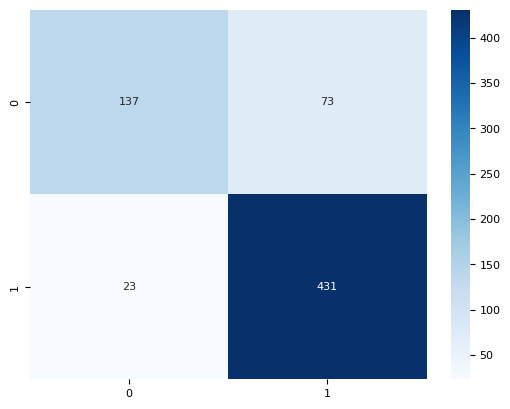

In [40]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)



svm_classifier.fit(X_train, y_train.values.ravel())



y_train_pred = svm_classifier.predict(X_train)

y_val_pred = svm_classifier.predict(X_val)

y_test_pred = svm_classifier.predict(X_test)



Conclusions.append( Evaluate('SVM', y_train_pred, y_val_pred, y_test_pred, y_test) )

## Random Forest Classifier

Train Accuracy: 1.0
Validation Accuracy: 0.8704819277108434
Test Accuracy: 0.8554216867469879
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      2116

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       231
           1       0.87      0.95      0.91       433

    accuracy                           0.87       664
   macro avg       0.87      0.84      0.85       664
weighted avg       0.87      0.87      0.87       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       210
           1       0.88  

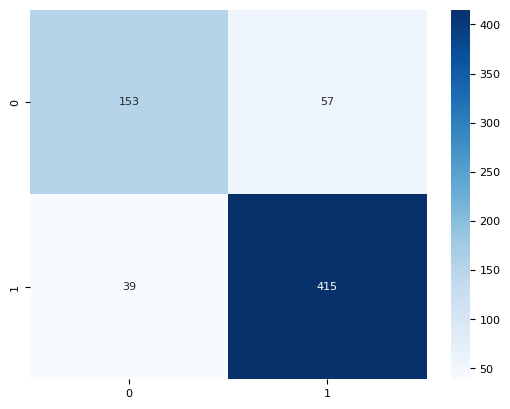

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
import joblib


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)



y_train_pred = rf_clf.predict(X_train)

y_val_pred = rf_clf.predict(X_val)

y_test_pred = rf_clf.predict(X_test)

joblib.dump(rf_clf, 'your_model.pkl')

Conclusions.append( Evaluate('Random Forest', y_train_pred, y_val_pred, y_test_pred, y_test) )

## Naive Bayes

Train Accuracy: 0.8062015503875969
Validation Accuracy: 0.8253012048192772
Test Accuracy: 0.8132530120481928
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70       980
           1       0.86      0.85      0.86      2116

    accuracy                           0.81      3096
   macro avg       0.78      0.78      0.78      3096
weighted avg       0.81      0.81      0.81      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       231
           1       0.85      0.89      0.87       433

    accuracy                           0.83       664
   macro avg       0.81      0.80      0.80       664
weighted avg       0.82      0.83      0.82       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       210
          

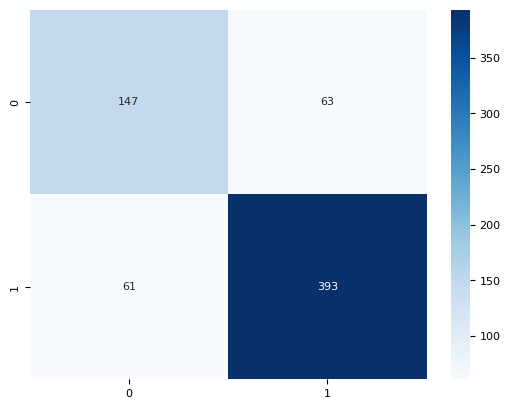

In [42]:
from sklearn.metrics import classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB



nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train.values.ravel())



y_train_pred = nb_classifier.predict(X_train)

y_val_pred = nb_classifier.predict(X_val)

y_test_pred = nb_classifier.predict(X_test)



Conclusions.append( Evaluate('Naive Bayes', y_train_pred, y_val_pred, y_test_pred, y_test) )

## Decision Tree

Train Accuracy: 1.0
Validation Accuracy: 0.7816265060240963
Test Accuracy: 0.7831325301204819
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      2116

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       231
           1       0.82      0.85      0.84       433

    accuracy                           0.78       664
   macro avg       0.76      0.75      0.75       664
weighted avg       0.78      0.78      0.78       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67       210
           1       0.86  

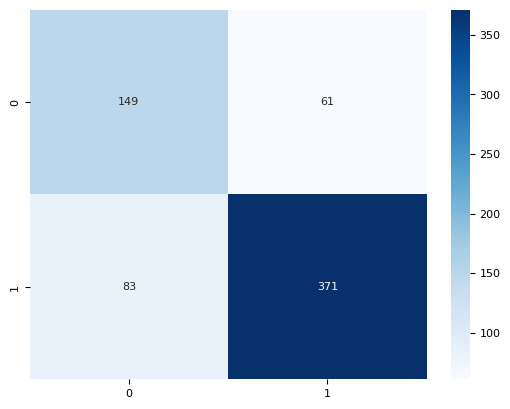

In [43]:
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier



clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)



y_train_pred = clf.predict(X_train)

y_val_pred = clf.predict(X_val)

y_test_pred = clf.predict(X_test)



Conclusions.append( Evaluate('Decision Tree', y_train_pred, y_val_pred, y_test_pred, y_test) )

## AdaBoost Classifier

Train Accuracy: 0.8714470284237726
Validation Accuracy: 0.8493975903614458
Test Accuracy: 0.8644578313253012
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78       980
           1       0.88      0.93      0.91      2116

    accuracy                           0.87      3096
   macro avg       0.86      0.84      0.85      3096
weighted avg       0.87      0.87      0.87      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       231
           1       0.86      0.92      0.89       433

    accuracy                           0.85       664
   macro avg       0.84      0.82      0.83       664
weighted avg       0.85      0.85      0.85       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       210
          

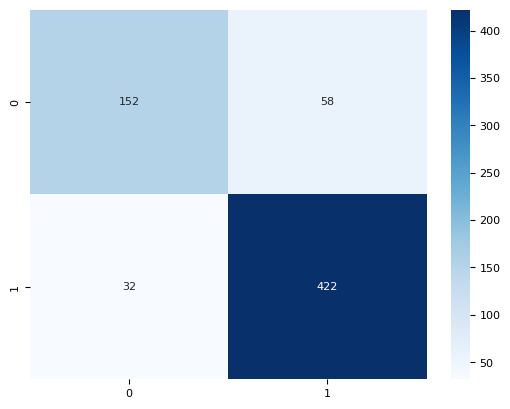

In [44]:
n_estimators = 100

clf = AdaBoostClassifier(n_estimators=n_estimators, algorithm="SAMME", random_state=0)

clf.fit(X_train, y_train)



y_train_pred = clf.predict(X_train)

y_val_pred = clf.predict(X_val)

y_test_pred = clf.predict(X_test)



Conclusions.append( Evaluate('AdaBoost Classifier', y_train_pred, y_val_pred, y_test_pred, y_test) )

### AdaBoost Classifier with Grid Search

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Best AdaBoost Classifier parameters: {'algorithm': 'SAMME.R', 'n_estimators': 100}
Train Accuracy: 0.8846899224806202
Validation Accuracy: 0.8734939759036144
Test Accuracy: 0.858433734939759
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       980
           1       0.89      0.94      0.92      2116

    accuracy                           0.88      3096
   macro avg       0.88      0.85      0.86      3096
weighted avg       0.88      0.88      0.88      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       231
           1       0.88      0.94      0.91       433

    accuracy                           0.87       664
   macro avg       0.87      0.85      0.86       664
weighted avg       0.87      0.87      0.87       664

Classification Report for Test Set:
               precision    recall  f1

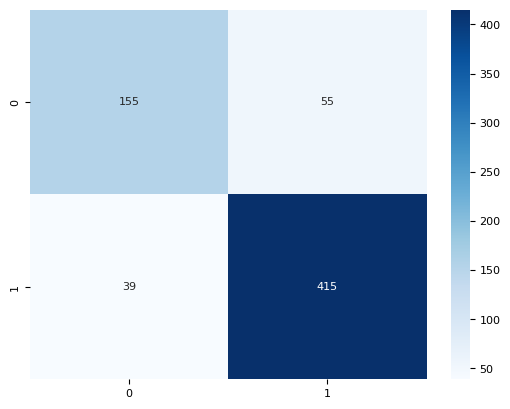

In [45]:
clf = AdaBoostClassifier(random_state=42)


parameters_grid = {

    'n_estimators': [50, 100, 200],

    'algorithm': ['SAMME', 'SAMME.R']

}



grid_search = GridSearchCV(clf, parameters_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)



best_ada_model = grid_search.best_estimator_

print(f'Best AdaBoost Classifier parameters: {grid_search.best_params_}')



y_train_pred = best_ada_model.predict(X_train)

y_val_pred = best_ada_model.predict(X_val)

y_test_pred = best_ada_model.predict(X_test)



Conclusions.append( Evaluate('AdaBoost Classifier with Grid Search', y_train_pred, y_val_pred, y_test_pred, y_test) )

## Gradient Boosting Classifier

Train Accuracy: 0.8846899224806202
Validation Accuracy: 0.8734939759036144
Test Accuracy: 0.858433734939759
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       980
           1       0.89      0.94      0.92      2116

    accuracy                           0.88      3096
   macro avg       0.88      0.85      0.86      3096
weighted avg       0.88      0.88      0.88      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       231
           1       0.88      0.94      0.91       433

    accuracy                           0.87       664
   macro avg       0.87      0.85      0.86       664
weighted avg       0.87      0.87      0.87       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       210
           

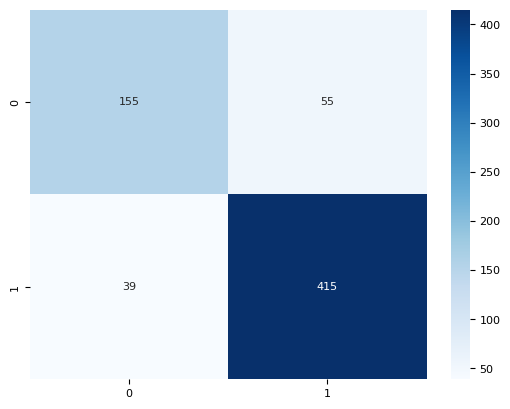

In [46]:
n_estimators = 100

max_depth = 3



clf = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

clf.fit(X_train, y_train)



y_pred_gb_test = clf.predict(X_test)

y_pred_gb_train = clf.predict(X_train)



Conclusions.append( Evaluate('Gradient Boosting Classifier', y_train_pred, y_val_pred, y_test_pred, y_test) )

### Gradient Boost Classifier with Grid Search

Best Gradient Boosting parameters: {'max_depth': 5, 'n_estimators': 50}
Train Accuracy: 0.9305555555555556
Validation Accuracy: 0.8569277108433735
Test Accuracy: 0.8734939759036144
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88       980
           1       0.92      0.98      0.95      2116

    accuracy                           0.93      3096
   macro avg       0.94      0.90      0.92      3096
weighted avg       0.93      0.93      0.93      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       231
           1       0.86      0.93      0.89       433

    accuracy                           0.86       664
   macro avg       0.85      0.83      0.84       664
weighted avg       0.86      0.86      0.85       664

Classification Report for Test Set:
               precision    recall  f1-score   s

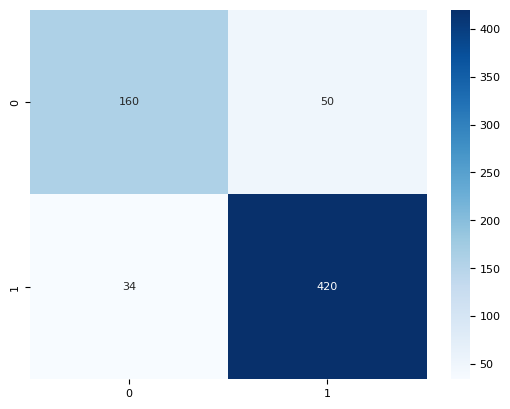

In [47]:
clf = GradientBoostingClassifier(random_state=0)



parameters_grid = {

    'n_estimators': [50, 100, 200],

    'max_depth': [3, 5, 7]

}



grid_search = GridSearchCV(clf, parameters_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)



best_gb_model = grid_search.best_estimator_

print(f'Best Gradient Boosting parameters: {grid_search.best_params_}')



y_test_pred = best_gb_model.predict(X_test)

y_train_pred = best_gb_model.predict(X_train)

y_val_pred = best_gb_model.predict(X_val)



Conclusions.append( Evaluate('AdaBoost Classifier with Grid Search', y_train_pred, y_val_pred, y_test_pred, y_test) )

## XGB Classifier

Train Accuracy: 0.8998708010335917
Validation Accuracy: 0.8599397590361446
Test Accuracy: 0.7454819277108434
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       980
           1       0.90      0.97      0.93      2116

    accuracy                           0.90      3096
   macro avg       0.90      0.86      0.88      3096
weighted avg       0.90      0.90      0.90      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       231
           1       0.86      0.93      0.90       433

    accuracy                           0.86       664
   macro avg       0.86      0.83      0.84       664
weighted avg       0.86      0.86      0.86       664

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.56      0.90      0.69       210
          

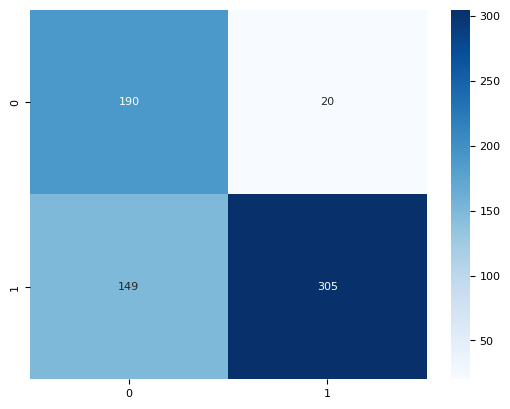

In [48]:
n_estimators = 100

max_depth = 3

gamma = 0

learning_rate = 0.1



model = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, gamma=gamma, random_state=42)

model.fit(X_train, y_train)



y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

y_val_pred = model.predict(X_val)



Conclusions.append( Evaluate('AdaBoost Classifier with Grid Search', y_train_pred, y_val_pred, y_test_pred, y_test) )

### XGB Classifier with Grid Search

Best XGBoost parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Train Accuracy: 0.9198966408268734
Validation Accuracy: 0.8614457831325302
Test Accuracy: 0.7469879518072289
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       980
           1       0.91      0.97      0.94      2116

    accuracy                           0.92      3096
   macro avg       0.92      0.89      0.90      3096
weighted avg       0.92      0.92      0.92      3096

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       231
           1       0.87      0.93      0.90       433

    accuracy                           0.86       664
   macro avg       0.86      0.83      0.84       664
weighted avg       0.86      0.86      0.86       664

Classification Report for Test Set:
               precis

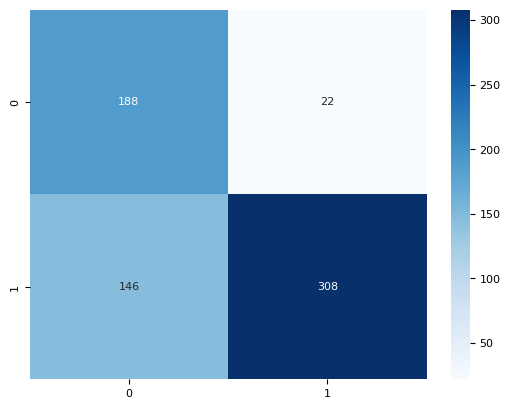

In [49]:
model = xgb.XGBClassifier(random_state=42)



paramters_grid = {

    'n_estimators': [50, 100, 200],

    'max_depth': [3, 5, 7],

    'learning_rate': [0.01, 0.1, 0.2],

    'gamma': [0, 0.1, 0.2]

}



grid_search = GridSearchCV(model, paramters_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)



best_xgb_model = grid_search.best_estimator_

print(f'Best XGBoost parameters: {grid_search.best_params_}')



y_train_pred = best_xgb_model.predict(X_train)

y_test_pred = best_xgb_model.predict(X_test)

y_val_pred = best_xgb_model.predict(X_val)



Conclusions.append( Evaluate('AdaBoost Classifier with Grid Search', y_train_pred, y_val_pred, y_test_pred, y_test) )

# Clustring

In [51]:
Robust= RobustScaler()

X_train_Robust = pd.DataFrame(Robust.fit_transform(X_train),columns=X_train.columns)

X_val_Robust = pd.DataFrame(Robust.fit_transform(X_val),columns=X_train.columns)

X_test_Robust = pd.DataFrame(Robust.fit_transform(X_test),columns=X_train.columns)

## KMeans

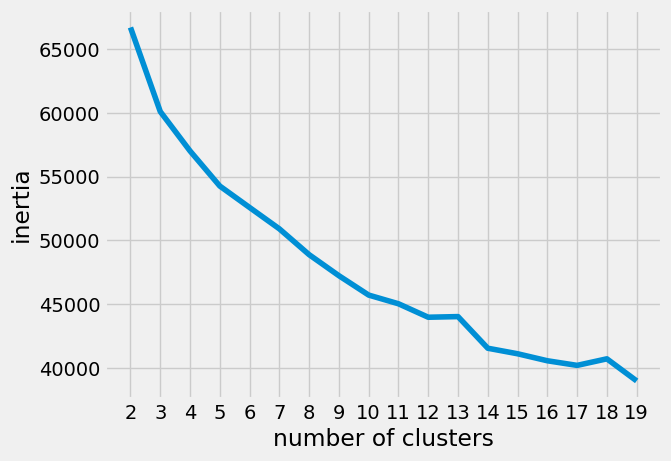

In [52]:
from sklearn.cluster import KMeans

# Kmeans With Standard PCA

iner=[]

for k in range(2,20):

  kmeans = KMeans(n_clusters=k)

  kmeans.fit(X_train)

  iner.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")

plt.plot(range(2,20),iner)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('inertia')

plt.show()

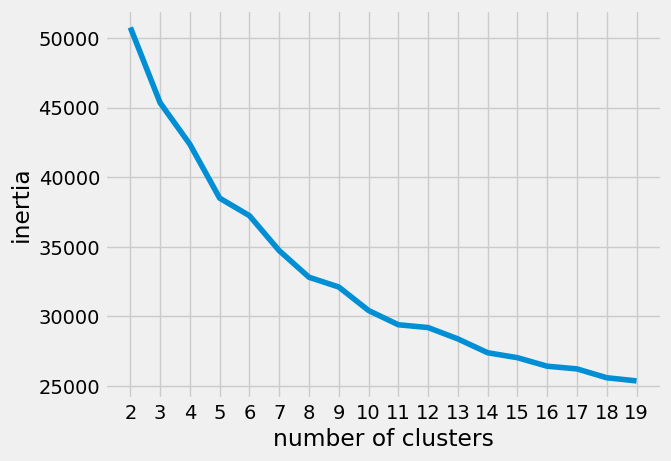

In [53]:
# Kmeans With Robust

iner=[]

for k in range(2,20):

  kmeans = KMeans(n_clusters=k)

  kmeans.fit(X_train_Robust)

  iner.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")

plt.plot(range(2,20),iner)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('inertia')

plt.show()

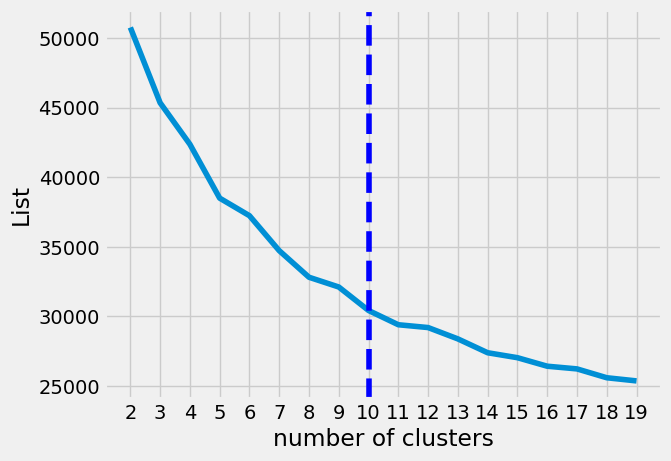

In [54]:
!pip install kneed

from kneed import KneeLocator

k1=KneeLocator(range(2,20),iner , curve='convex', direction= 'decreasing')

k1.elbow



plt.style.use("fivethirtyeight")

plt.plot(range(2,20),iner)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('List')

plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')

plt.show()

In [55]:
from sklearn.metrics import silhouette_score

silhouette_coefficients =[]

for k in range(2,20):#1 is the worse

    kmeans=KMeans(n_clusters=k)

    kmeans.fit(X_train_Robust)

    score= silhouette_score(X_train_Robust, kmeans.labels_)

    silhouette_coefficients.append(score)

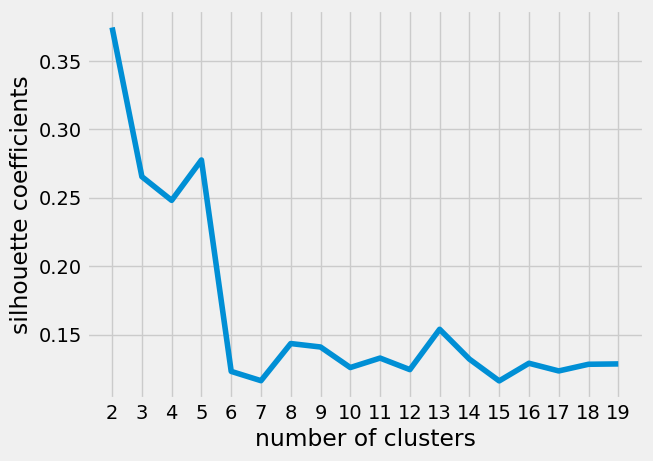

In [56]:
plt.style.use("fivethirtyeight")

plt.plot(range(2,20),silhouette_coefficients)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('silhouette coefficients')

plt.show()

In [57]:
kmeans= KMeans(n_clusters=6)

y_kmeans= pd.DataFrame(kmeans.fit_predict(X_train_Robust))

centroids=pd.DataFrame(kmeans.cluster_centers_)

In [58]:
from sklearn.decomposition import PCA

pca3=PCA(n_components=3)

Clusterd_data=pd.DataFrame(pca3.fit_transform(X_train_Robust),columns=['Feature 1','Feature 2','Feature 3'])

Clusterd_data['Label']=y_kmeans

In [59]:
import plotly.express as px

plt.figure(figsize=(8, 8))

fig=px.scatter_3d(Clusterd_data,x='Feature 1', y='Feature 2',z='Feature 3', color='Label',title='Kmeans' )

fig.show()

<Figure size 800x800 with 0 Axes>

## Ward Linkage

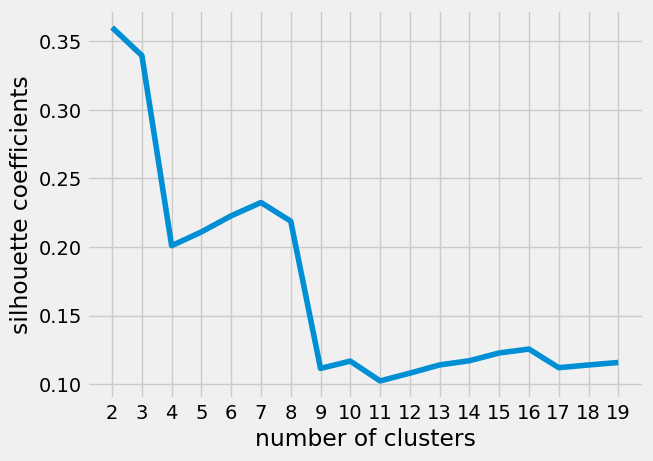

In [60]:
from sklearn.cluster import AgglomerativeClustering



silhouette_coefficients =[]

for k in range(2,20):#1 is the worse

    agg_clustering = AgglomerativeClustering(n_clusters=k)

    agg_clustering.fit(X_train_Robust)

    score= silhouette_score(X_train_Robust, agg_clustering.labels_)

    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")

plt.plot(range(2,20),silhouette_coefficients)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('silhouette coefficients')

plt.show()

In [61]:
from sklearn.manifold import TSNE



agg_clustering = AgglomerativeClustering(n_clusters=4)

labels = pd.DataFrame(agg_clustering.fit_predict(X_train_Robust))

Agg=X_train_Robust.copy()

tsne = TSNE(n_components=3, random_state=42)

Agg=pd.DataFrame(tsne.fit_transform(Agg),columns=['Feature 1','Feature 2','Feature 3'])

Agg['Labels']=labels

In [62]:
plt.figure(figsize=(8, 8))

px.scatter_3d(Agg,x='Feature 1', y='Feature 2',z='Feature 3', color='Labels',title='AGG -Ward' )

<Figure size 800x800 with 0 Axes>

## Average Linkage

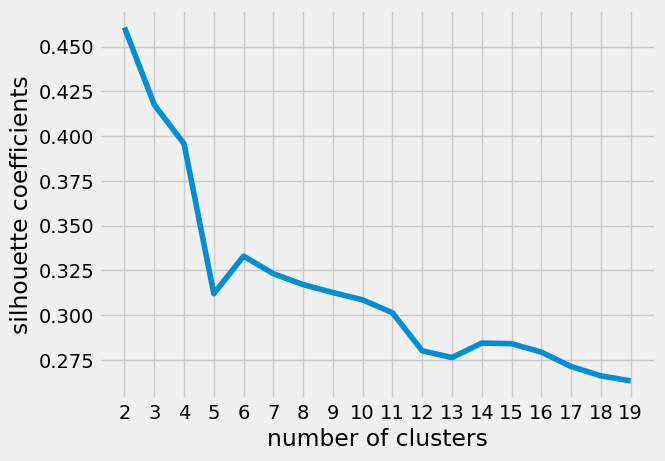

In [63]:
silhouette_coefficients =[]

for k in range(2,20):#1 is the worse

    agg_clustering = AgglomerativeClustering(n_clusters=k,linkage='average')

    agg_clustering.fit(X_train_Robust)

    score= silhouette_score(X_train_Robust, agg_clustering.labels_)

    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")

plt.plot(range(2,20),silhouette_coefficients)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('silhouette coefficients')

plt.show()

In [64]:
agg_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')

labels = pd.DataFrame(agg_clustering.fit_predict(X_train_Robust))

Agg=X_train_Robust.copy()

tsne = TSNE(n_components=3, random_state=42)

Agg=pd.DataFrame(tsne.fit_transform(Agg),columns=['Feature 1','Feature 2','Feature 3'])

Agg['Labels']=labels

In [65]:
plt.figure(figsize=(8, 8))

px.scatter_3d(Agg,x='Feature 1', y='Feature 2',z='Feature 3', color='Labels',title='AGG - Average' )

<Figure size 800x800 with 0 Axes>

## Complete Linkage

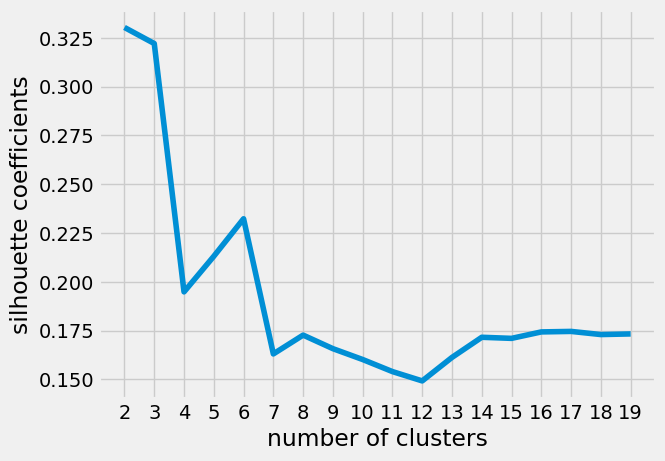

In [66]:
silhouette_coefficients =[]

for k in range(2,20):

    agg_clustering = AgglomerativeClustering(n_clusters=k,linkage='complete')

    agg_clustering.fit(X_train_Robust)

    score= silhouette_score(X_train_Robust, agg_clustering.labels_)

    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")

plt.plot(range(2,20),silhouette_coefficients)

plt.xticks(range(2,20))

plt.xlabel('number of clusters')

plt.ylabel('silhouette coefficients')

plt.show()

In [67]:
agg_clustering = AgglomerativeClustering(n_clusters=7,linkage='complete')

labels = pd.DataFrame(agg_clustering.fit_predict(X_train_Robust))

Agg=X_train_Robust.copy()

tsne = TSNE(n_components=3, random_state=42)

Agg=pd.DataFrame(tsne.fit_transform(Agg),columns=['Feature 1','Feature 2','Feature 3'])

Agg['Labels']=labels

In [68]:
plt.figure(figsize=(8, 8))

px.scatter_3d(Agg,x='Feature 1', y='Feature 2',z='Feature 3', color='Labels',title='AGG - Complete' )

<Figure size 800x800 with 0 Axes>

# Conclusion

In [69]:
Conclusions = pd.DataFrame(Conclusions[1:], columns=Conclusions[0])

Conclusions

Model Name     Train  Validion      Test
0                    Logistic Regression  0.874677  0.861446  0.853916
1                                    KNN  0.852713  0.819277  0.837349
2                                    SVM  0.861111  0.850904  0.855422
3                          Random Forest  1.000000  0.870482  0.855422
4                            Naive Bayes  0.806202  0.825301  0.813253
5                          Decision Tree  1.000000  0.781627  0.783133
6                    AdaBoost Classifier  0.871447  0.849398  0.864458
7   AdaBoost Classifier with Grid Search  0.884690  0.873494  0.858434
8           Gradient Boosting Classifier  0.884690  0.873494  0.858434
9   AdaBoost Classifier with Grid Search  0.930556  0.856928  0.873494
10  AdaBoost Classifier with Grid Search  0.899871  0.859940  0.745482
11  AdaBoost Classifier with Grid Search  0.919897  0.861446  0.746988

In [70]:
print(X_test.iloc[0].to_string())

Marital status                       -0.315420
Application mode                     -1.123515
Application order                    -0.584382
Course                                0.022616
Daytime/evening attendance            0.340538
Previous qualification               -0.448143
Mother's qualification                1.151774
Father's qualification                1.023089
Mother's occupation                   0.373248
Father's occupation                   0.280762
Displaced                             0.899591
Debtor                               -0.375358
Tuition fees up to date               0.356840
Gender                                1.425470
Scholarship holder                   -0.544862
Age at enrollment                    -0.813310
GDP                                   0.758807
I/U Ratio                             0.113860
Curricular units avg credited        -0.340274
Curricular avg enrolled               0.058803
Curricular avg evaluations           -0.164555
Curricular av